<a href="https://colab.research.google.com/github/zjzsu2000/CMPE297_Sec49AdvanceDL/blob/master/Assignment_1/Assignment_1_Part_1/Assignment1_part1_MIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment1_part1_MIL

Jacky Chow (Jie Zou)
ID:014545284





MIL(Multiple Instance Learning) is a weakly supervised learning method that uses a set of labeled bags containing many instances instead of receiving a set of labeled instances.


> The character of  MIL is that individual unlabeled but bags/groups labeled. 
There are many applications, such as the medical field that all negative-is negative. (If at least one positive, a bag is positive)


In the MIL framework, slides are "packages" and tiles are "instances". By using it, we can save marking work and utilize weakly marked data.
When we receive a pathological section of a patient, we want to predict whether the large section contains cancer cells, or whether the patient has malignant cells. Multi-instance learning is a good choice because the doctor does not need to divide a single cell or divide each cell. Cells are labeled with tiles. Only the entire slide requires labels.
Generally, multi-instance learning can deal with classification problems, regression problems, ranking problems, and clustering problems, but here we will mainly focus on classification problems.


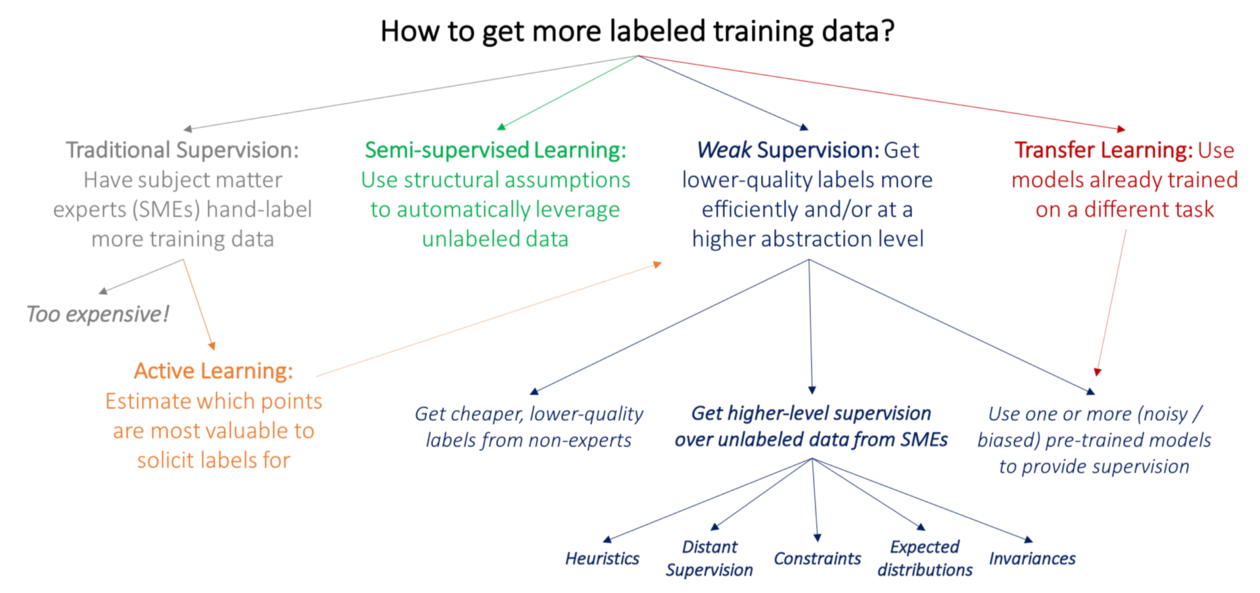

In this colab, I will illustrate how MIL works through a simple example based on the German credit data set.

ref:

*   https://digitalcommons.mtu.edu/cgi/viewcontent.cgi?article=1974&context=etdr
*   https://learning.oreilly.com/library/view/multimodal-learning-toward/9781681736297/#toc
*    https://medium.com/swlh/multiple-instance-learning-c49bd21f5620
*    https://learning.oreilly.com/library/view/deep-learning-for/9780128104095/B9780128104088000067.xhtml (Links to an external site.)

 






# **Business case and value**

When the bank receives the loan application, based on the applicant's personal data, the bank must decide whether to proceed with the loan approval. Bank decisions are related to two types of risks:

 
*   Fisrt:If the applicant has good credit risk, that is, the loan may be repaid, then disapproving the person ’s loan will result in loss of banking business.
*   The other one: Else If the applicant has serious credit risk, such as it is unlikely to repay the loan, then the approval of the person ’s loan will cause financial losses to the bank.







> Objective of Analysis:Minimization of risk and maximization of profit on behalf of the bank base on the  Credit Reports Analysis using different algorithms.

In order to minimize losses from the perspective of the bank, the bank needs to make decision rules to determine who approves the loan and who does not approve it.



> 5 C credit
The five C grades of credit are systems used by lenders to assess the creditworthiness of potential borrowers. The five Cs of credit are nature, ability, capital, mortgage and condition.





Character: Customer's credit history

Capacity: Assess the borrower ’s debt-to-income ratio

Capital: Assess the borrower ’s seriousness

Collateral: It guarantees the lender that if the borrower defaults on the loan, the lender can get something back by taking back the collateral

Conditions: Conditions are external variables that may affect credit and credit quality. This refers to national, international and local economies, industries and banks themselves.

refence:https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1872804

## It is expected that the predictive model developed based on this data will provide guidance to the bank manager to decide whether to approve the loan to the applicant based on his / her profile.








In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data narrative**



reference:
http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

https://online.stat.psu.edu/onlinecourses/sites/stat508/files/german_credit.csv

This project we will use the German credit dataset.

1. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

2. Number of Instances:  1000

3. Data Set Information:
Two datasets are provided. the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data".For algorithms that need numerical attributes, Strathclyde University produced the file "german.data-numeric". This file has been edited and several indicator variables added to make it suitable for algorithms which cannot cope with categorical variables. Several attributes that are ordered categorical (such as attribute 17) have been coded as integer. This was the form used by StatLog.

This dataset requires use of a cost matrix:


__1 2

1 0 1

2 5 0

(1 = Good, 2 = Bad)---the rows represent the actual classification and the columns the predicted classification.
--It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).

4. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)

5.  Attribute description 

Attribute 1:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no






The original dataset contains 1000 entries with 20 categorial/symbolic attributes. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes(1/2). 



> Note: The last column of both the categorical dataset (21st column) and the numerical dataset (25th column) represents the credit score classification of that person (1 = good, 2 = bad).
Some columns are split from the original column based on column value, that's why we have more value in numeric dataset
Both represent the same data. Their “encoding” method is as follows: most of the categorical values were converted to numerical by  ignoring the first chars  (e.g:  A11 becomes  1;  A14 becomes 4,…)
You indeed have more columns in the “numerical” file but it just because some categorical columns have multiple values and thus they were broke in 1+ column so that each numerical column has only binary values.



So we can make the Features_list:"account_check_status","duration_in_month","credit_history","purpose","credit_amount","savings","present_emp_since","installment_as_income_perc","personal_status_sex","other_debtors","present_res_since","property","age","other_installment_plans","housing","credits_this_bank","job","people_under_maintenance","telephone","foreign_worker"，"classification"

In [12]:
features_list=["account_check_status","duration_in_month","credit_history","purpose","credit_amount","savings","present_emp_since","installment_as_income_perc","personal_status_sex","other_debtors","present_res_since","property","age","other_installment_plans","housing","credits_this_bank","job","people_under_maintenance","telephone","foreign_worker","classification"]

In [13]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", header=None, delim_whitespace=True)

In [15]:
df.head()

0   1    2    3     4    5    6   ...    14 15    16  17    18    19 20
0  A11   6  A34  A43  1169  A65  A75  ...  A152  2  A173   1  A192  A201  1
1  A12  48  A32  A43  5951  A61  A73  ...  A152  1  A173   1  A191  A201  2
2  A14  12  A34  A46  2096  A61  A74  ...  A152  1  A172   2  A191  A201  1
3  A11  42  A32  A42  7882  A61  A74  ...  A153  1  A173   2  A191  A201  1
4  A11  24  A33  A40  4870  A61  A73  ...  A153  2  A173   2  A191  A201  2

[5 rows x 21 columns]

In [ ]:
df.tail()

0   1    2    3     4    5    6   ...    14 15    16  17    18    19 20
995  A14  12  A32  A42  1736  A61  A74  ...  A152  1  A172   1  A191  A201  1
996  A11  30  A32  A41  3857  A61  A73  ...  A152  1  A174   1  A192  A201  1
997  A14  12  A32  A43   804  A61  A75  ...  A152  1  A173   1  A191  A201  1
998  A11  45  A32  A43  1845  A61  A73  ...  A153  1  A173   1  A192  A201  2
999  A12  45  A34  A41  4576  A62  A71  ...  A152  1  A173   1  A191  A201  1

[5 rows x 21 columns]

In [16]:
df.columns=features_list

In [ ]:
df.head()

account_check_status  duration_in_month  ... foreign_worker classification
0                  A11                  6  ...           A201              1
1                  A12                 48  ...           A201              2
2                  A14                 12  ...           A201              1
3                  A11                 42  ...           A201              1
4                  A11                 24  ...           A201              2

[5 rows x 21 columns]

In [ ]:
print(df.shape)
print (df.columns)

(1000, 21)
Index(['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'credit_amount', 'savings', 'present_emp_since',
       'installment_as_income_perc', 'personal_status_sex', 'other_debtors',
       'present_res_since', 'property', 'age', 'other_installment_plans',
       'housing', 'credits_this_bank', 'job', 'people_under_maintenance',
       'telephone', 'foreign_worker', 'classification'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   account_check_status        1000 non-null   object
 1   duration_in_month           1000 non-null   int64 
 2   credit_history              1000 non-null   object
 3   purpose                     1000 non-null   object
 4   credit_amount               1000 non-null   int64 
 5   savings                     1000 non-null   object
 6   present_emp_since           1000 non-null   object
 7   installment_as_income_perc  1000 non-null   int64 
 8   personal_status_sex         1000 non-null   object
 9   other_debtors               1000 non-null   object
 10  present_res_since           1000 non-null   int64 
 11  property                    1000 non-null   object
 12  age                         1000 non-null   int64 
 13  other_installment_plans     1000 non-null   objec

So it makes sense now.

In [ ]:
df.describe()

duration_in_month  ...  classification
count        1000.000000  ...     1000.000000
mean           20.903000  ...        1.300000
std            12.058814  ...        0.458487
min             4.000000  ...        1.000000
25%            12.000000  ...        1.000000
50%            18.000000  ...        1.000000
75%            24.000000  ...        2.000000
max            72.000000  ...        2.000000

[8 rows x 8 columns]

Let's map the data value to the real meaning

In [17]:
account_check_status={'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM ",'A14':"no checking account"}
df["account_check_status"]=df["account_check_status"].map(account_check_status)

credit_history={"A30":"no credits taken","A31":"all credits at this bank paid back duly","A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now"}
df["credit_history"]=df["credit_history"].map(credit_history)

purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["purpose"]=df["purpose"].map(purpose)

savings={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["savings"]=df["savings"].map(savings)

present_emp_since={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["present_emp_since"]=df["present_emp_since"].map(present_emp_since)

personal_status_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["personal_status_sex"]=df["personal_status_sex"].map(personal_status_sex)


other_debtors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["other_debtors"]=df["other_debtors"].map(other_debtors)

property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["property"]=df["property"].map(property)

other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["other_installment_plans"]=df["other_installment_plans"].map(other_installment_plans)

housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["housing"]=df["housing"].map(housing)

job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["job"]=df["job"].map(job)

telephone={'A192':"yes", 'A191':"none"}
df["telephone"]=df["telephone"].map(telephone)

foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign_worker"]=df["foreign_worker"].map(foreign_worker)

classification={1:"Good Risk", 2:"Bad Risk"}
df["classification"]=df["classification"].map(classification)


And the numeric one:

In [18]:
df_numeric = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric", header=None, delim_whitespace=True,error_bad_lines=False)

In [19]:
df_numeric.head()

0   1   2   3   4   5   6   7   8   ...  16  17  18  19  20  21  22  23  24
0   1   6   4  12   5   5   3   4   1  ...   0   1   0   0   1   0   0   1   1
1   2  48   2  60   1   3   2   2   1  ...   0   1   0   0   1   0   0   1   2
2   4  12   4  21   1   4   3   3   1  ...   0   1   0   0   1   0   1   0   1
3   1  42   2  79   1   4   3   4   2  ...   0   0   0   0   0   0   0   1   1
4   1  24   3  49   1   3   3   4   4  ...   0   1   0   0   0   0   0   1   2

[5 rows x 25 columns]

In [20]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1000 non-null   int64
 1   1       1000 non-null   int64
 2   2       1000 non-null   int64
 3   3       1000 non-null   int64
 4   4       1000 non-null   int64
 5   5       1000 non-null   int64
 6   6       1000 non-null   int64
 7   7       1000 non-null   int64
 8   8       1000 non-null   int64
 9   9       1000 non-null   int64
 10  10      1000 non-null   int64
 11  11      1000 non-null   int64
 12  12      1000 non-null   int64
 13  13      1000 non-null   int64
 14  14      1000 non-null   int64
 15  15      1000 non-null   int64
 16  16      1000 non-null   int64
 17  17      1000 non-null   int64
 18  18      1000 non-null   int64
 19  19      1000 non-null   int64
 20  20      1000 non-null   int64
 21  21      1000 non-null   int64
 22  22      1000 non-null   int64
 23  23      1000 n

In [ ]:
df_numeric.describe()

0            1   ...           23           24
count  1000.000000  1000.000000  ...  1000.000000  1000.000000
mean      2.577000    20.903000  ...     0.630000     1.300000
std       1.257638    12.058814  ...     0.483046     0.458487
min       1.000000     4.000000  ...     0.000000     1.000000
25%       1.000000    12.000000  ...     0.000000     1.000000
50%       2.000000    18.000000  ...     1.000000     1.000000
75%       4.000000    24.000000  ...     1.000000     2.000000
max       4.000000    72.000000  ...     1.000000     2.000000

[8 rows x 25 columns]

In [ ]:
df_numeric.head()

0   1   2   3   4   5   6   7   8   ...  16  17  18  19  20  21  22  23  24
0   1   6   4  12   5   5   3   4   1  ...   0   1   0   0   1   0   0   1   1
1   2  48   2  60   1   3   2   2   1  ...   0   1   0   0   1   0   0   1   2
2   4  12   4  21   1   4   3   3   1  ...   0   1   0   0   1   0   1   0   1
3   1  42   2  79   1   4   3   4   2  ...   0   0   0   0   0   0   0   1   1
4   1  24   3  49   1   3   3   4   4  ...   0   1   0   0   0   0   0   1   2

[5 rows x 25 columns]


Target Variable


> Cost Matrix

> 1 = Good credit risks

> 2 = Bad credit risks










I will use the original dataset here.

Some information of dataset

In [21]:
column_names=df.columns.tolist()
column_names

['account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'foreign_worker',
 'classification']

numerical variable Variable

In [22]:
df.describe()

duration_in_month  ...  people_under_maintenance
count        1000.000000  ...               1000.000000
mean           20.903000  ...                  1.155000
std            12.058814  ...                  0.362086
min             4.000000  ...                  1.000000
25%            12.000000  ...                  1.000000
50%            18.000000  ...                  1.000000
75%            24.000000  ...                  1.000000
max            72.000000  ...                  2.000000

[8 rows x 7 columns]

In [23]:
num_cols = ['duration_in_month','credit_amount',  'installment_as_income_perc', 'present_res_since', 'age', 'credits_this_bank', 'people_under_maintenance', 'classification']

In [24]:
cons_number_cols=['duration_in_month','credit_amount', 'age']

Categorical Variable

In [25]:
cat_cols=column_names.copy()

In [26]:
len(cat_cols)

21

In [27]:
for col in cons_number_cols:
  cat_cols.remove(col)

In [28]:
len(cat_cols)

18

In [29]:
cat_cols

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'foreign_worker',
 'classification']

In [30]:
import statsmodels.api as sm

In [31]:
cat_cols_cats={}
for name in cat_cols:
    cat_cols_cats[name]=len(df[name].unique().tolist())
    

In [32]:
cat_cols_cats

{'account_check_status': 4,
 'classification': 2,
 'credit_history': 5,
 'credits_this_bank': 4,
 'foreign_worker': 2,
 'housing': 3,
 'installment_as_income_perc': 4,
 'job': 4,
 'other_debtors': 3,
 'other_installment_plans': 3,
 'people_under_maintenance': 2,
 'personal_status_sex': 4,
 'present_emp_since': 5,
 'present_res_since': 4,
 'property': 4,
 'purpose': 10,
 'savings': 5,
 'telephone': 2}

So it seems that almost features(except cons_number_cols) is Categorical Variable. Some num_cols are categorical in fact.

In [33]:
report_cluster={}

for i in range(0,np.asarray(list(cat_cols_cats.values())).max()+1):
    if [j for j,k in cat_cols_cats.items() if k == i]:
        report_cluster[i]=[l for l,m in cat_cols_cats.items() if m == i]


In [34]:
report_cluster

{2: ['people_under_maintenance',
  'telephone',
  'foreign_worker',
  'classification'],
 3: ['other_debtors', 'other_installment_plans', 'housing'],
 4: ['account_check_status',
  'installment_as_income_perc',
  'personal_status_sex',
  'present_res_since',
  'property',
  'credits_this_bank',
  'job'],
 5: ['credit_history', 'savings', 'present_emp_since'],
 10: ['purpose']}

In [35]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [36]:
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

In [37]:
def style_specific_cell(x):
    color_thresh = 'background-color: lightgreen'   
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    column_number=len(x.columns)
    for r in range(0,rows_number): 
        for c in range(0,column_number):
            try:
                val=float(x.iloc[r, c])
                if x.iloc[r, 0]=="%":
                    if val<10:
                        df_color.iloc[r, c]=color_thresh
            except:
                pass            
    return df_color

In [38]:
def make_percent_report(report_cluster,key,df):
    percentage_report=[]
    for name in sorted(report_cluster[key]):
        data=pd.crosstab(df[name],columns=["%"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"%"]
        data=data.transpose().reset_index()
        [percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    percentage_report=pd.DataFrame(percentage_report)
    [options.append("Category"+str(itr)) for itr in range(1,len(percentage_report.columns))]
    percentage_report.columns=["Features"]+options
    display(percentage_report.style.apply(style_specific_cell, axis=None))

In [ ]:
report_cluster.keys()

dict_keys([2, 3, 4, 5, 10])

In [ ]:
make_percent_report(report_cluster,2,df)

In [ ]:
make_percent_report(report_cluster,3,df)

In [ ]:
make_percent_report(report_cluster,4,df)

In [ ]:
make_percent_report(report_cluster,5,df)

In [ ]:
make_percent_report(report_cluster,10,df)

Most predictors are categorical and have multiple categories, but some features have few observations at certain levels. Based on the cell ratios given in the one-way table above, we may be able to merge certain categories of specific features.

# **Data Visualizations**

Let's check how many missing values are in each column and of what data types they are.

In [39]:
print("Database has {} customers and {} columns (attributes).".format(df.shape[0],df.shape[1]))
print("Missing values in each column:\n{}".format(df.isnull().sum()))
print("Columns data types:\n{}".format(df.dtypes))

Database has 1000 customers and 21 columns (attributes).
Missing values in each column:
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
classification                0
dtype: int64
Columns data types:
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings               

In [ ]:
print("Database has {} customers and {} columns (attributes) in data_numeric.".format(df_numeric.shape[0],df_numeric.shape[1]))
print("Missing values in each column:\n{}".format(df_numeric.isnull().sum()))
print("Columns data types:\n{}".format(df_numeric.dtypes))

Database has 1000 customers and 25 columns (attributes) in data_numeric.
Missing values in each column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Columns data types:
0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
dtype: object


It seems that the quality of the data is good, and there is no missing data

Let's see the target distribution

In [41]:
target=df.classification

target.value_counts()

Good Risk    700
Bad Risk     300
Name: classification, dtype: int64

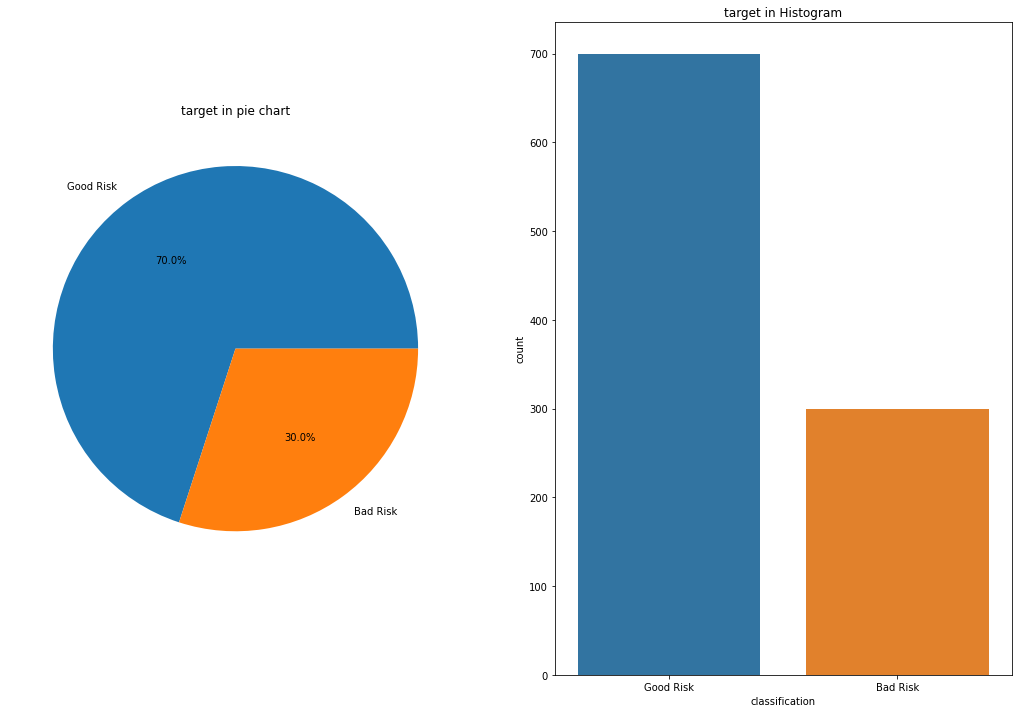

good: 700
bad:  300


In [42]:
#plot value counts for target in pie chart and Histogram
f,ax=plt.subplots(1,2,figsize=(18,12))
target.value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[0],subplots=True)
ax[0].set_title('target in pie chart')
ax[0].set_ylabel('')
sns.countplot(label='count',x='classification',data=df,ax=ax[1])
ax[1].set_title('target in Histogram')
plt.show()
class_good, class_bad = target.value_counts()
print("good:" , class_good)
print('bad: ', class_bad)

In [43]:
def plot_corr(df):
  correlation=df.corr()
  plt.figure(figsize=(25,25))
  sns.heatmap(correlation,annot=True,cmap='coolwarm')

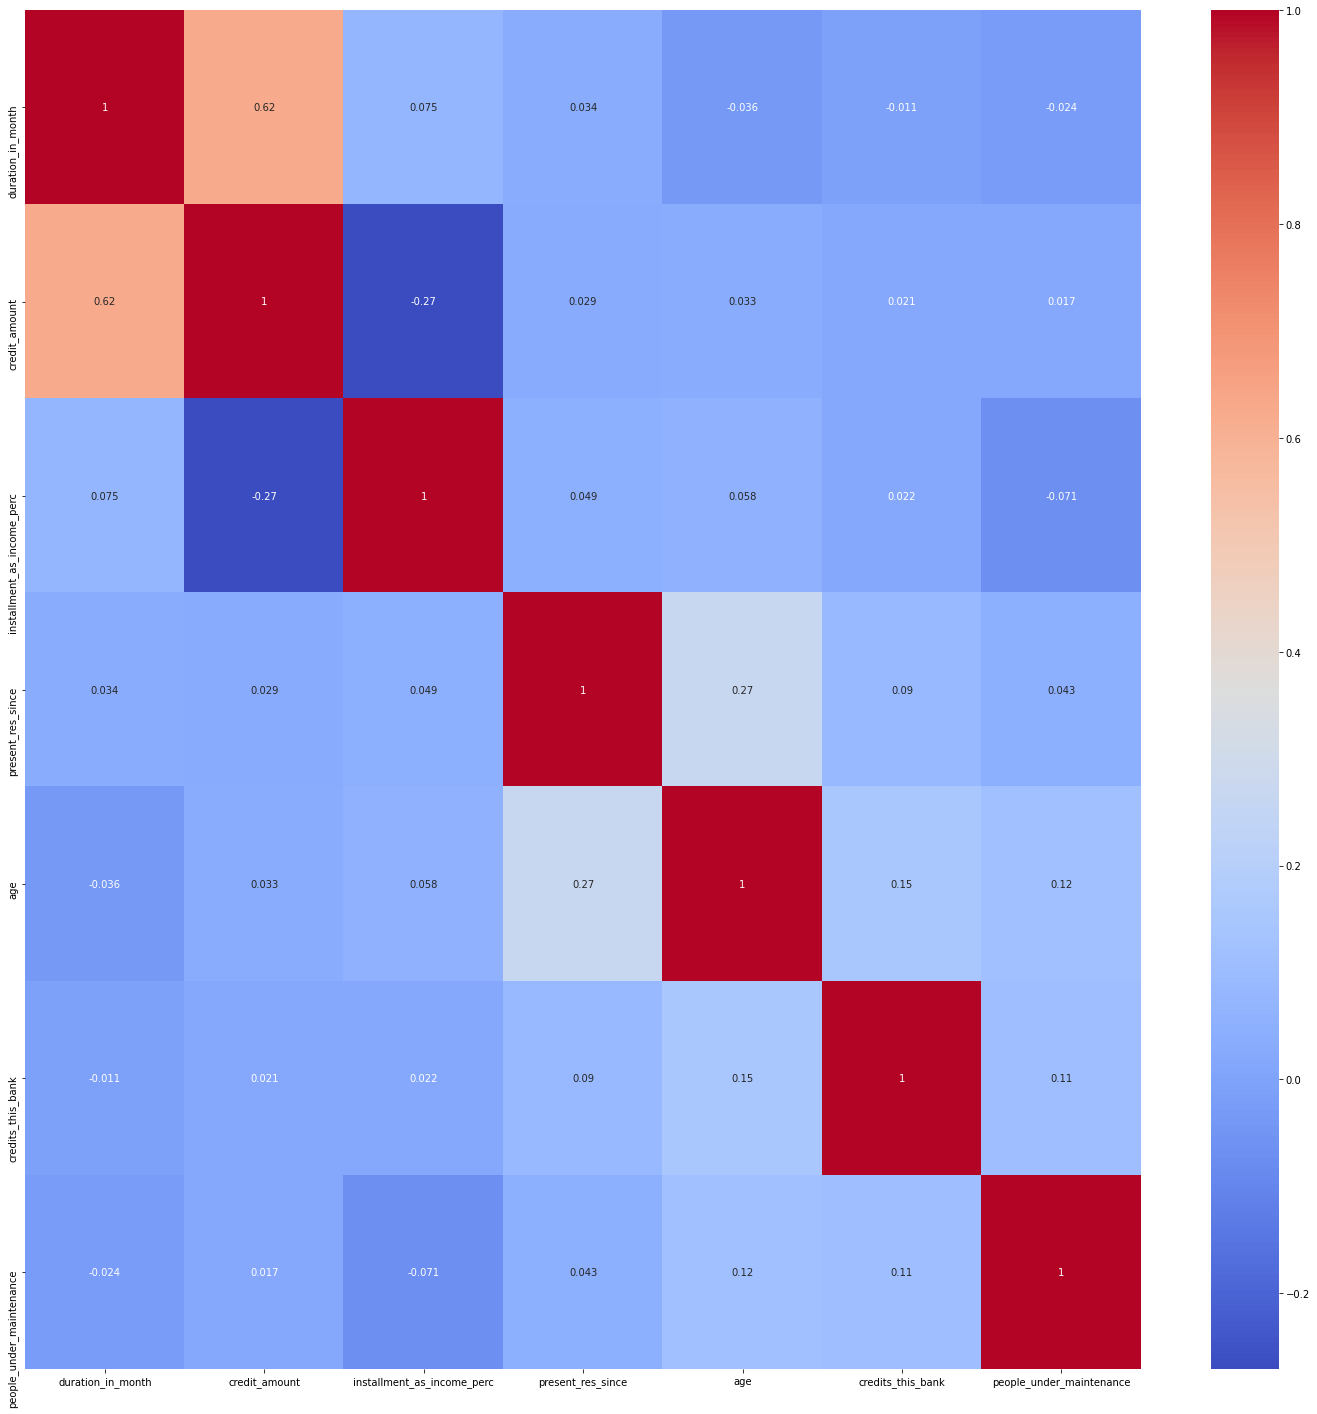

In [44]:
plot_corr(df)

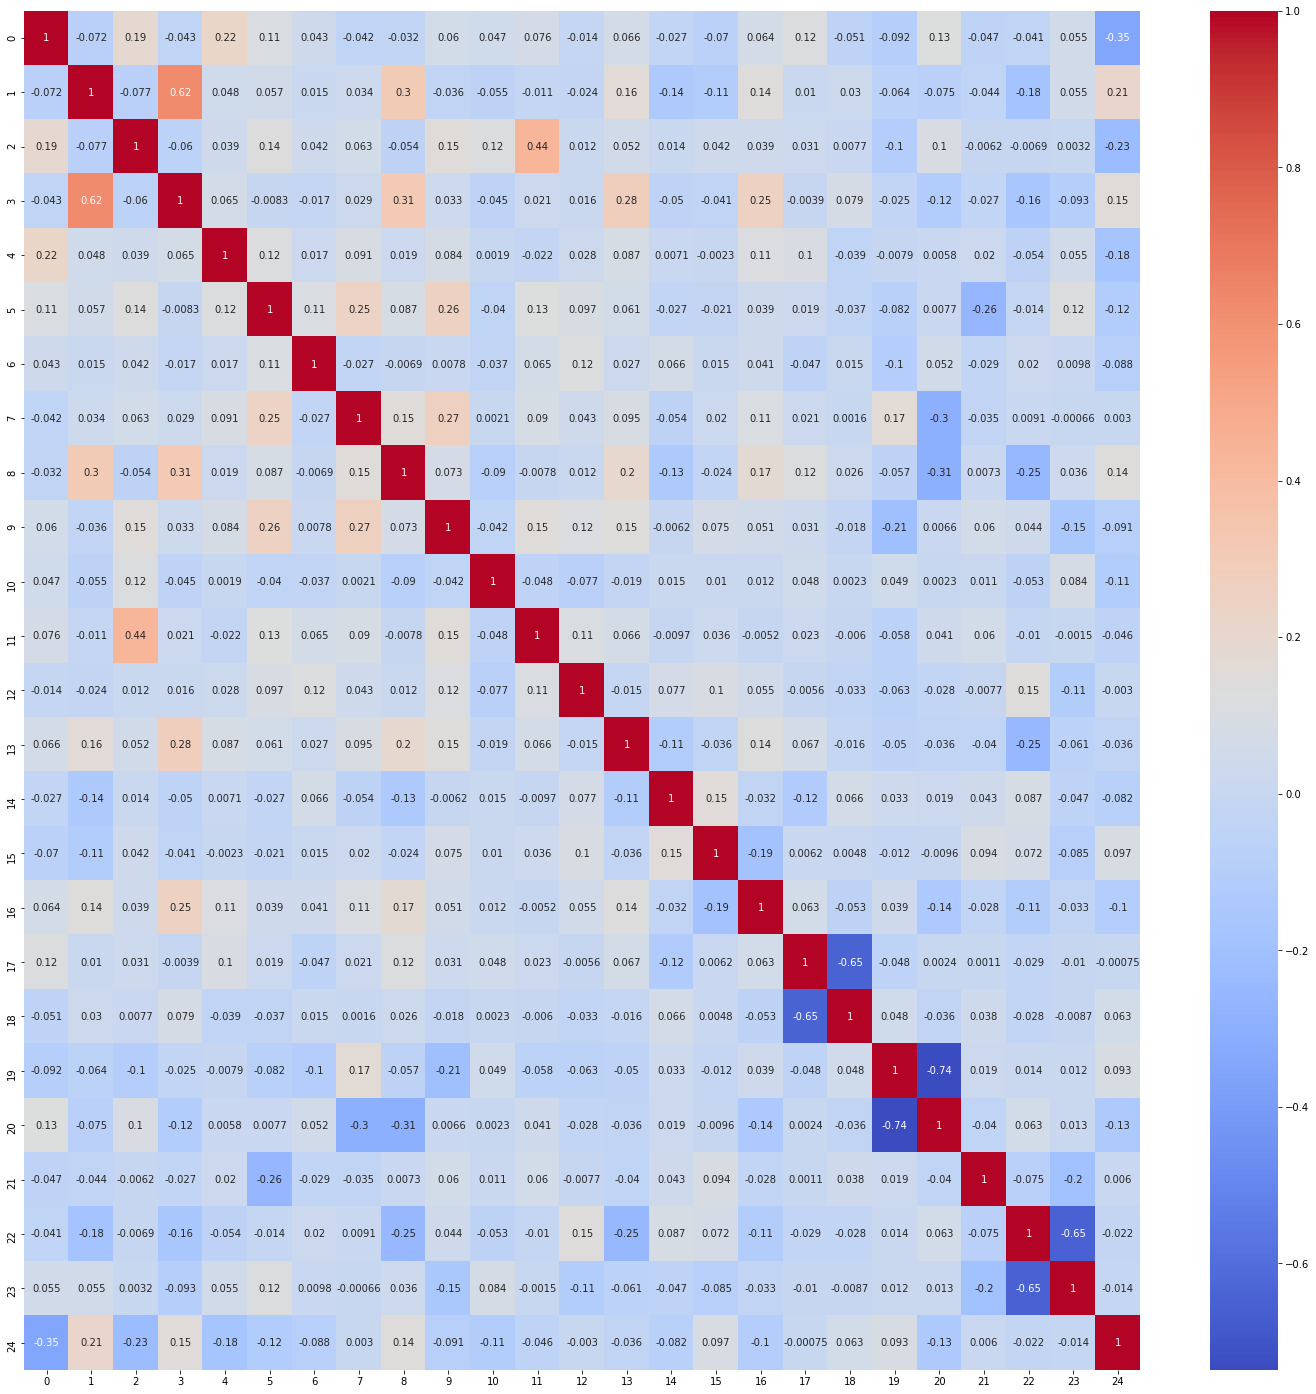

In [45]:
plot_corr(df_numeric)

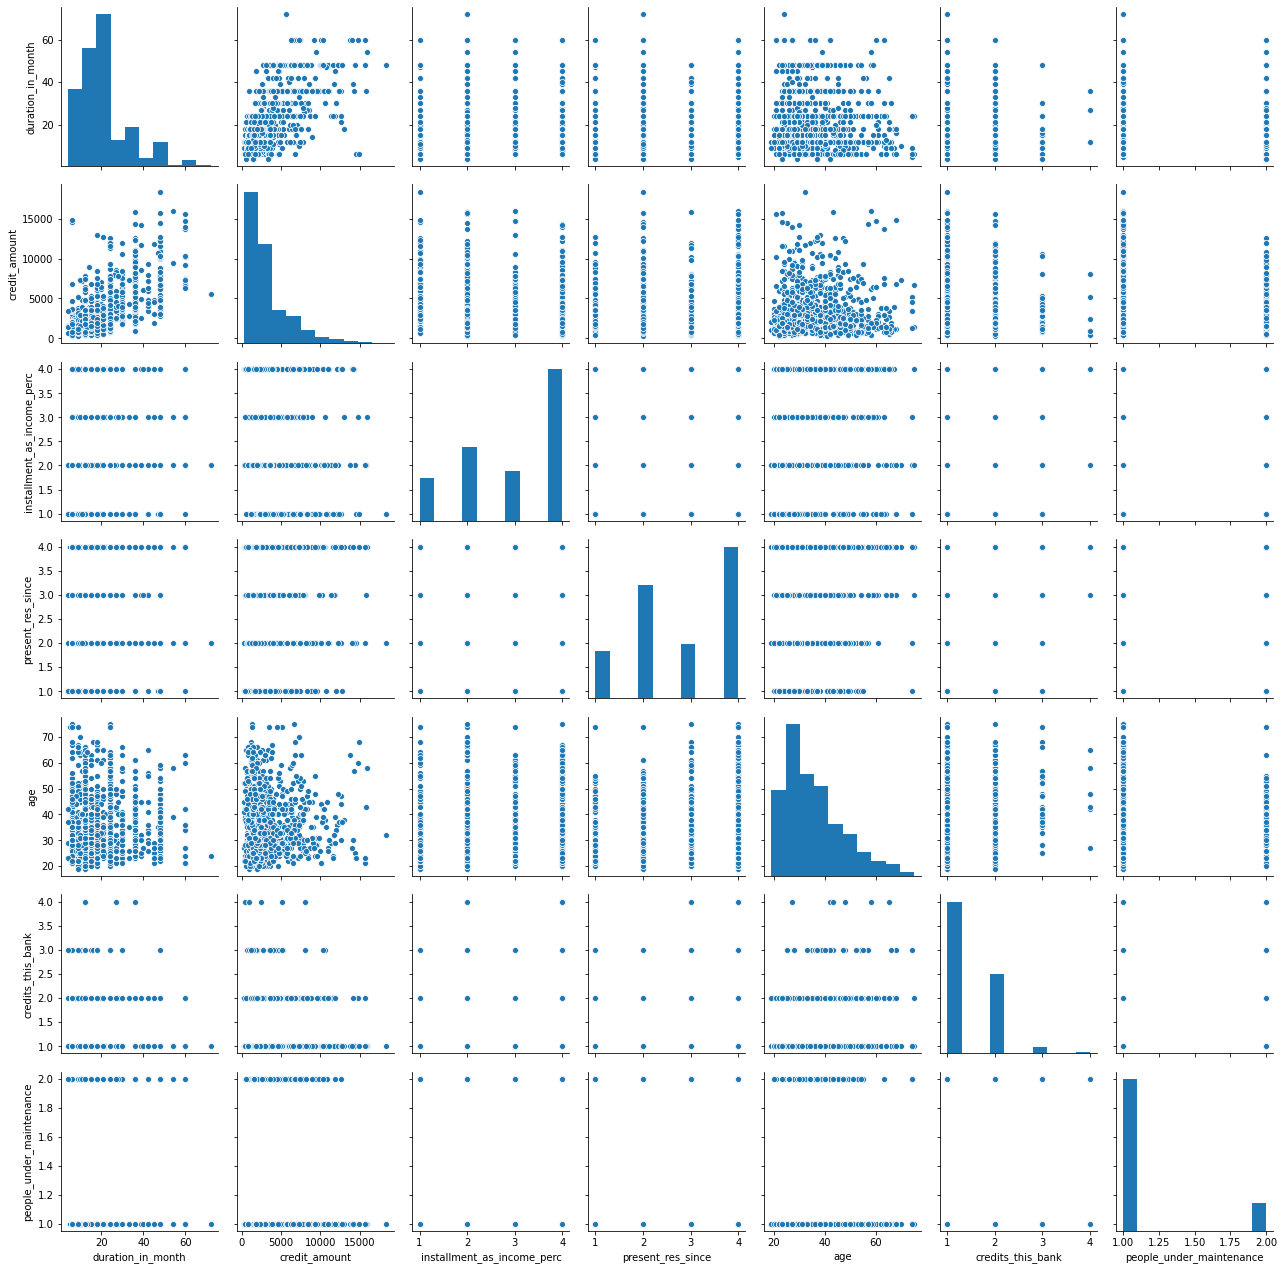

In [46]:
sns.pairplot(df)

<Figure size 432x288 with 0 Axes>

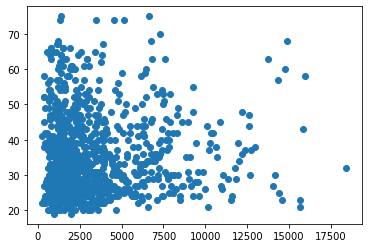

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(df['credit_amount'],df['age'])
plt.figure()

<Figure size 432x288 with 0 Axes>

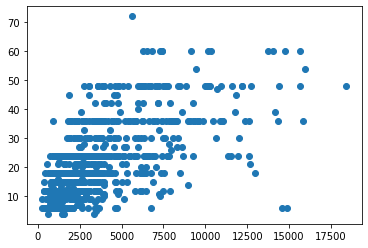

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(df['credit_amount'],df['duration_in_month'])
plt.figure()

From visual inspection, it seems that there is some positive correlation between duration and amount of credit, what makes sense.

<Figure size 432x288 with 0 Axes>

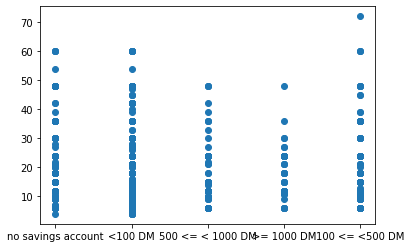

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(df['savings'],df["duration_in_month"])
plt.figure()

let's see the categorical data:

In [49]:
print("Unique values in each categorical column:")
for column in df.select_dtypes(include=[object]):
    print(column,":", df[column].unique())

Unique values in each categorical column:
account_check_status : ['<0 DM' '0 <= <200 DM' 'no checking account' '>= 200 DM ']
credit_history : ['critical account' 'existing credits paid back duly till now'
 'delay in paying off' 'no credits taken'
 'all credits at this bank paid back duly']
purpose : ['radio/television' 'education' 'furniture/equipment' 'car (new)'
 'car (used)' 'business' 'domestic appliances' 'repairs' 'others'
 'retraining']
savings : ['no savings account' '<100 DM' '500 <= < 1000 DM' '>= 1000 DM'
 '100 <= <500 DM']
present_emp_since : ['>=7 years' '1<= < 4 years' '4<= <7 years' 'unemployed' '<1 years']
personal_status_sex : ['male:single' 'female:divorced/separated/married'
 'male:divorced/separated' 'male:married/widowed']
other_debtors : ['none' 'guarantor' 'co-applicant']
property : ['real estate' 'savings agreement/life insurance' 'unknown / no property'
 'car or other']
other_installment_plans : ['none' 'bank' 'store']
housing : ['own' 'for free' 'rent']
job : 

plot target vs account_check_status,and target:credit_history 

A function which will generate plots for three numeric variables with stratification by selected categorical column.

In [ ]:
def scatter_plot(data, h=None, pal=None):
   fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
   sns.scatterplot(x="credit_amount",y="duration_in_month", hue=h, palette=pal, data=data, ax=ax1)
   sns.scatterplot(x="age",y="credit_amount", hue=h, palette=pal, data=data, ax=ax2)
   sns.scatterplot(x="age",y="duration_in_month", hue=h, palette=pal, data=data, ax=ax3)
   plt.tight_layout()

Apply scatter_plots our 3 numerical variables stratified by job




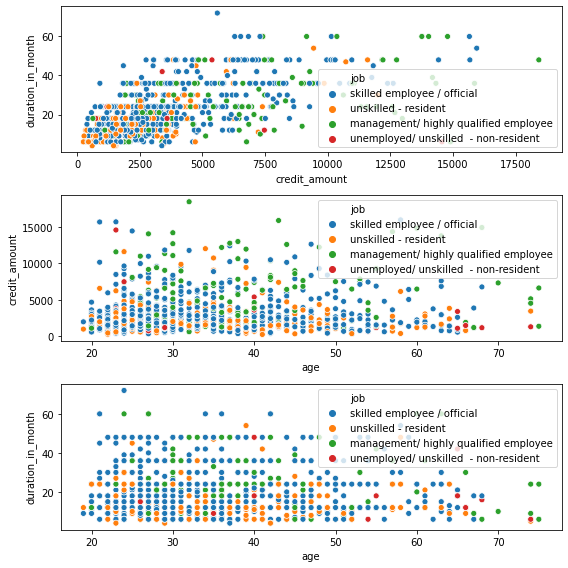

In [ ]:
scatter_plot(df, h="job")

Apply scatter_plots our 3 numerical variables stratified by *account_check_status*

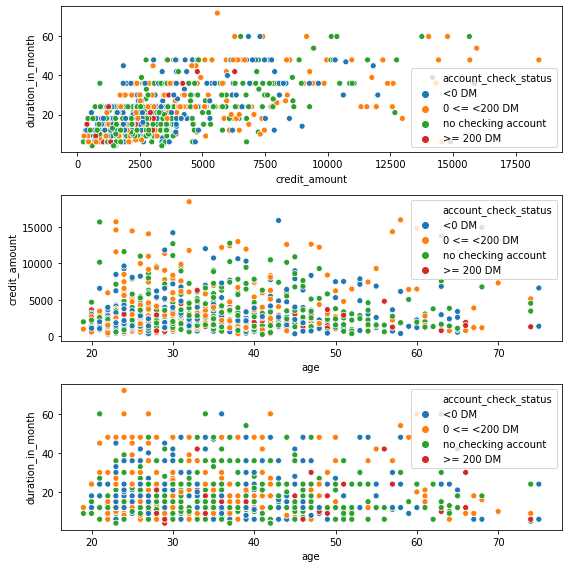

In [ ]:
scatter_plot(df, h="account_check_status")

Apply scatter_plots our 3 numerical variables stratified by "credit_history"

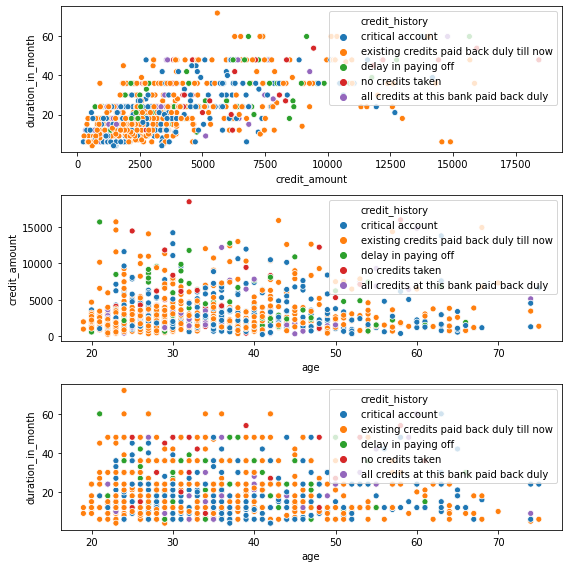

In [ ]:
scatter_plot(df, h="credit_history")

Apply scatter_plots our 3 numerical variables stratified by "savings  "

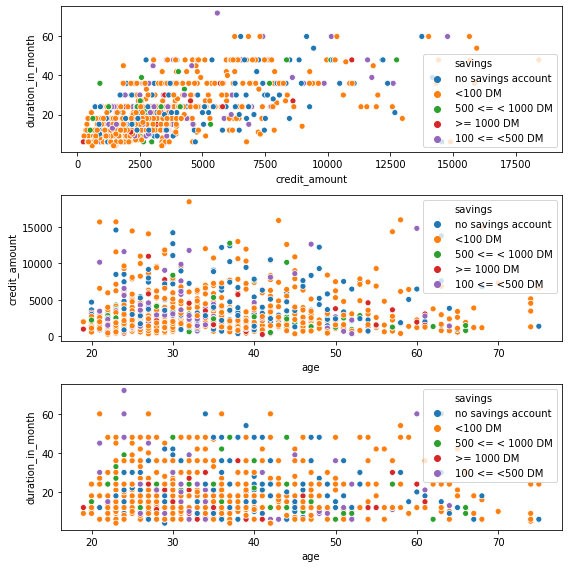

In [ ]:
scatter_plot(df, h="savings")

Apply scatter_plots our 3 numerical variables stratified by "personal_status_sex "

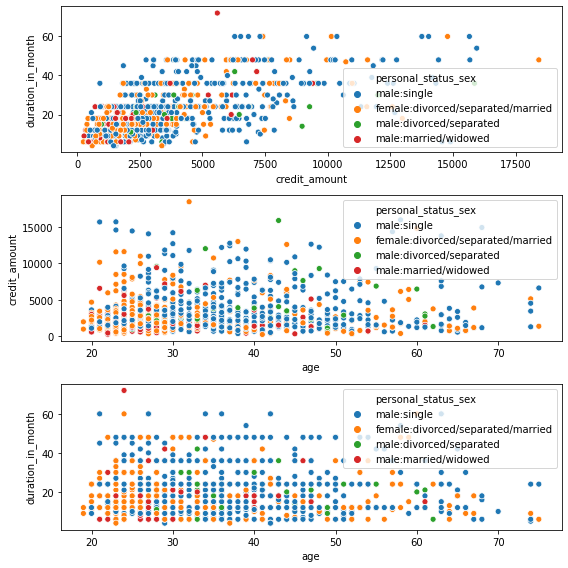

In [ ]:
scatter_plot(df, h="personal_status_sex")

However, the plot shows that there is no clear difference between personal_status_sex in terms of amount and duration of the credit in the dataset. 



Apply scatter_plots our 3 numerical variables stratified by "housing "

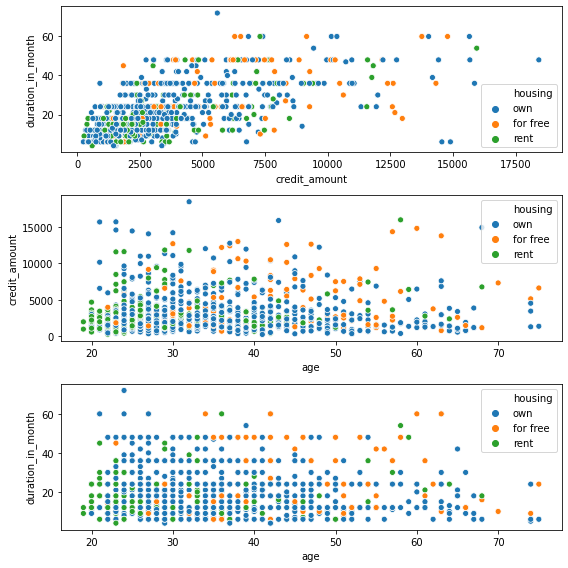

In [ ]:
scatter_plot(df, h="housing")

Let’s check the linear correlation between credit amount and duration

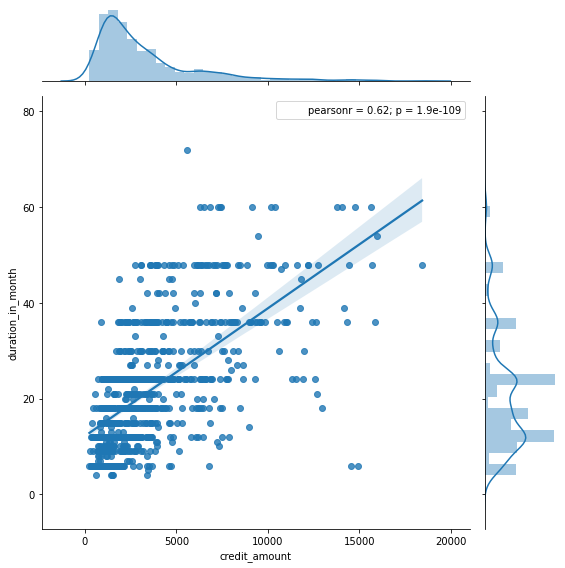

In [50]:
import scipy.stats as stats
r1 = sns.jointplot(x="credit_amount",y="duration_in_month", data=df, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

The figure above shows the linear correlation of Pearson value of 0.62 and very small p-value. This makes sense, because usually people will get more credit for a longer period of time. 

Let's analyze linear regression graphs with various classifications.

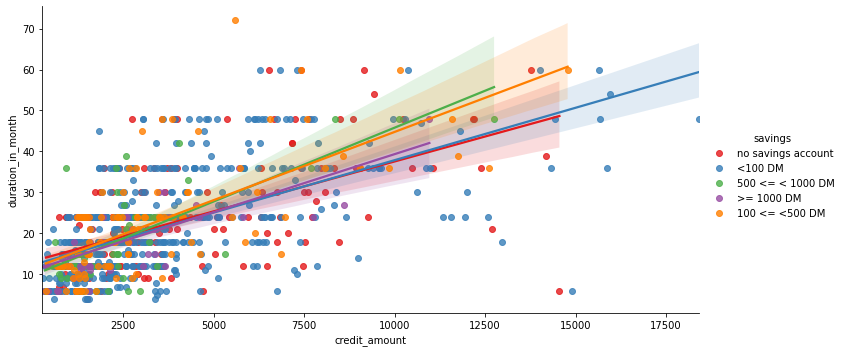

In [ ]:
sns.lmplot(x="credit_amount",y="duration_in_month", hue="savings", data=df, palette="Set1", aspect=2)
plt.show()

The plot above indicates that there is no significant difference between savings.

Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM

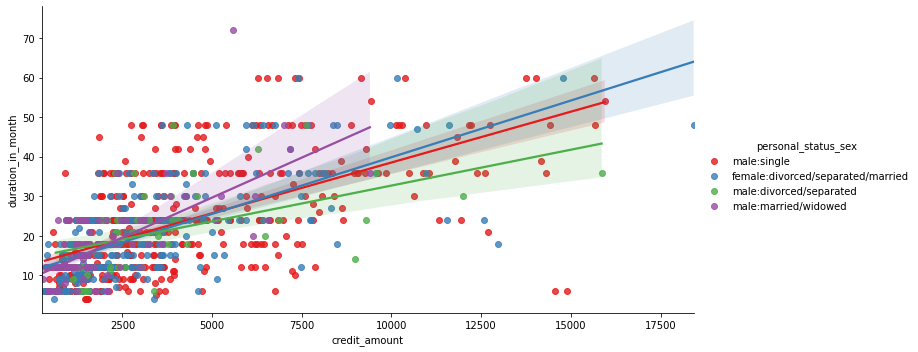

In [ ]:
sns.lmplot(x="credit_amount",y="duration_in_month", hue="personal_status_sex", data=df, palette="Set1", aspect=2)
plt.show()

The plot above indicates that there is no significant difference between personal_status_sex.

here  
A91 : male   : divorced/separated
A92 : female : divorced/separated/married
A93 : male   : single
A94 : male   : married/widowed
A95 : female : single

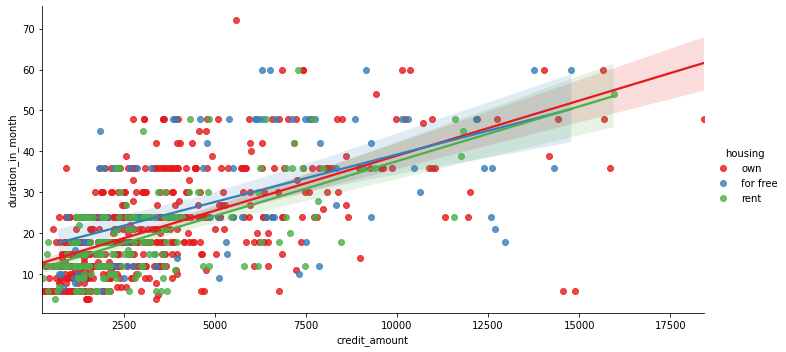

In [ ]:
sns.lmplot(x="credit_amount",y="duration_in_month", hue="housing", data=df, palette="Set1", aspect=2)
plt.show()

The plot above indicates that there is no significant difference between housing.
      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

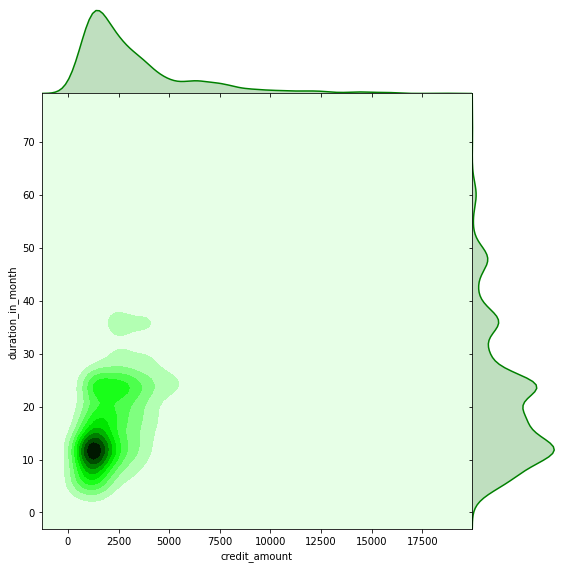

In [ ]:
sns.jointplot("credit_amount","duration_in_month", data=df, kind="kde", space=0, color="g",  height=8)
plt.show()

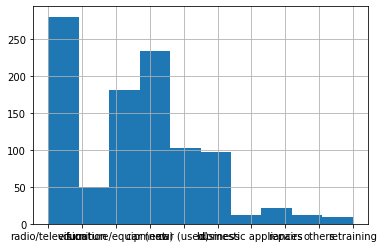

In [ ]:
fig = df["purpose"].hist(bins=10)

Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others


<Figure size 432x288 with 0 Axes>

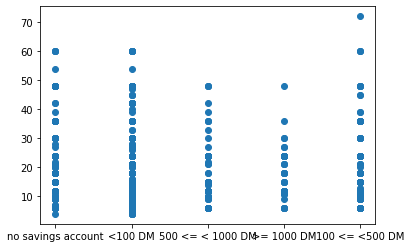

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(df.savings,df.duration_in_month)
plt.figure()

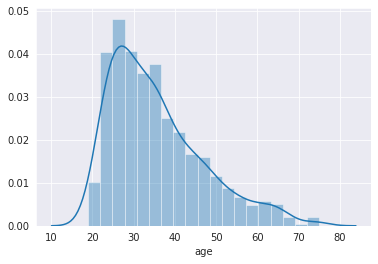

In [ ]:
sns.set_style('darkgrid')
sns.distplot(df['age'])

People from Age 22 to 42 are the target customers

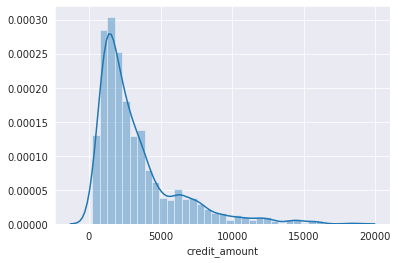

In [ ]:
sns.distplot(df.credit_amount)

Short term credit with credit range [500,4500] yield maximum customer and profits.

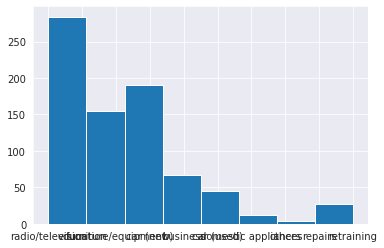

In [ ]:
limited_credit = df[(df.credit_amount<=4500)==True]
fig = limited_credit.purpose.hist(bins=8)

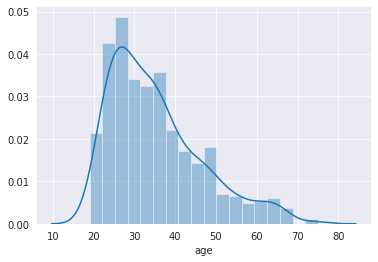

In [ ]:
sns.distplot(limited_credit.age)

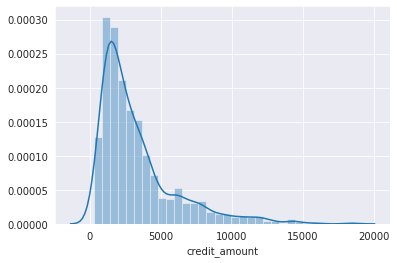

In [ ]:
target_age=df[(df.age>=22)==True]
target_age=target_age[(target_age.age<=42)==True]
sns.distplot(target_age.credit_amount)

taget_age customer have similar credit_amount.500-4500.

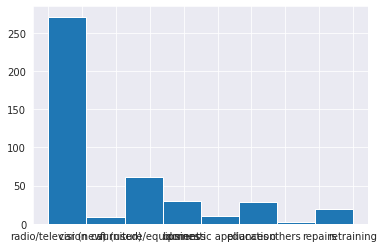

In [ ]:
small_credit = df[(df.credit_amount<2000)==True]
fig = small_credit.purpose.hist(bins=8)

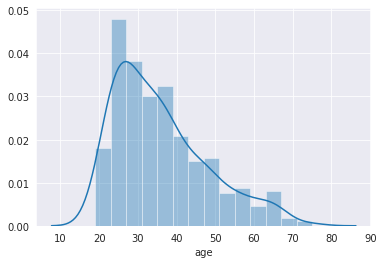

In [ ]:
sns.distplot(small_credit.age)

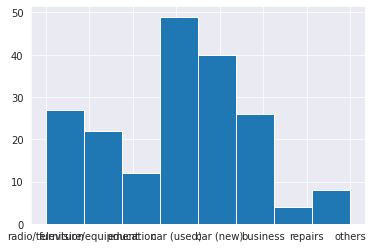

In [ ]:
large_credit=df[(df.credit_amount>5000)==True];
fig = large_credit.purpose.hist(bins=8)

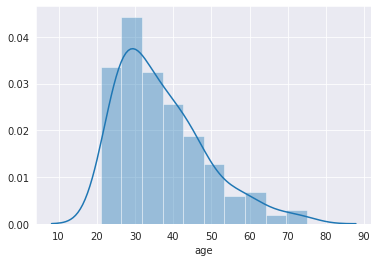

In [ ]:
sns.distplot(large_credit.age)

large_credit offer to young customers more.

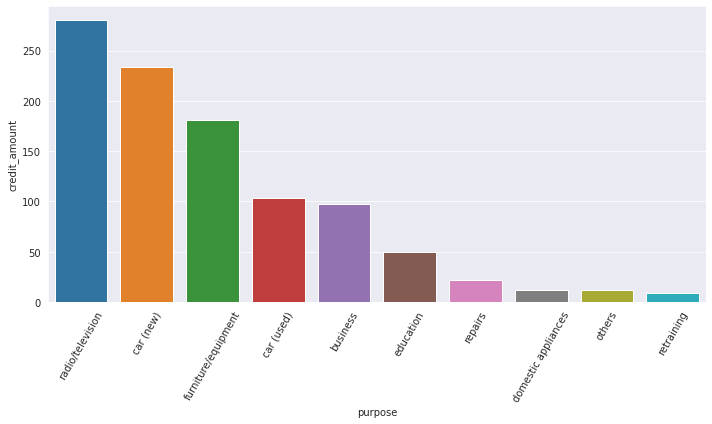

In [ ]:
num_credit = df.groupby("purpose")["credit_amount"].count().rename("Count").reset_index()
num_credit .sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="purpose",y="Count",data=num_credit)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("credit_amount")
plt.tight_layout()

Purpose A40 : car (new) A41 : car (used) A42 : furniture/equipment A43 : radio/television A44 : domestic appliances A45 : repairs A46 : education A47 : (vacation - does not exist?) A48 : retraining A49 : business A410 : others

Most of credits were granted for radio/TV and car .It means offering for car loan and radio/television loan can pick up more customers or lenders.

##But the dataset was made on 17 Nov 1994,maybe it is too old to represent the trend of now. We should try to get some newer dataset or merge the classes. Radio/television loan is not popular now.

boxplot

In [ ]:
def boxplots(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,10))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

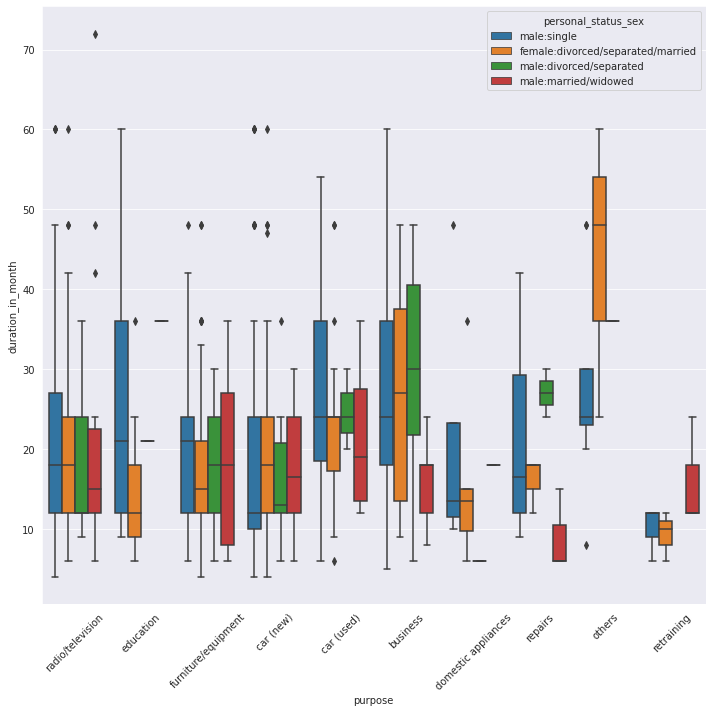

In [ ]:
boxplots("purpose","duration_in_month","personal_status_sex")

Purpose A40 : car (new) A41 : car (used) A42 : furniture/equipment A43 : radio/television A44 : domestic appliances A45 : repairs A46 : education A47 : (vacation - does not exist?) A48 : retraining A49 : business A410 : others

  Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
                      A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Generally("others" is a special one), there is no difference in the credit period of different personal_status_sex. We also can't see the clear trend between categories, because it is observed that the shortest duration is household appliances.

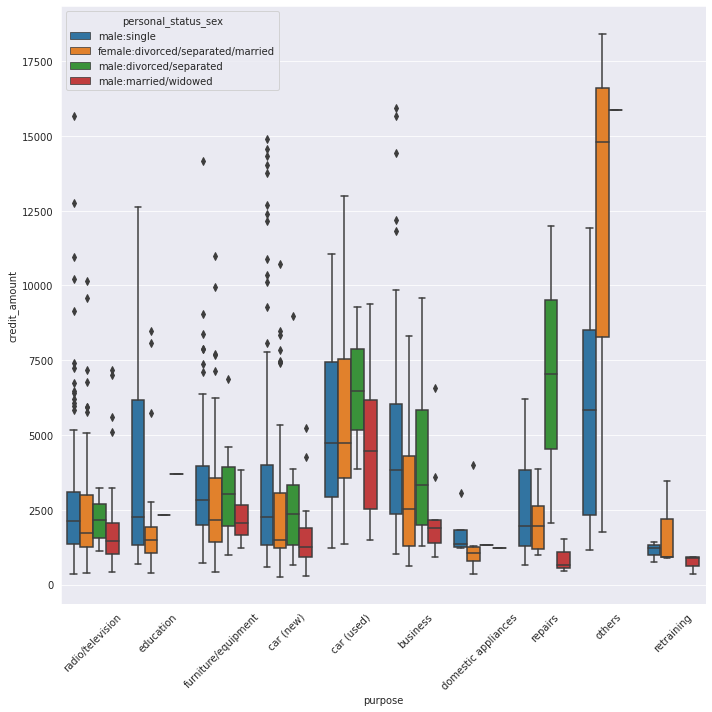

In [ ]:
boxplots("purpose","credit_amount","personal_status_sex")

Purpose A40 : car (new) A41 : car (used) A42 : furniture/equipment A43 : radio/television A44 : domestic appliances A45 : repairs A46 : education A47 : (vacation - does not exist in this dataset) A48 : retraining A49 : business A410 : others

The plot above shows that the biggest amounts are taken for others, the smallest for domestic appliances.

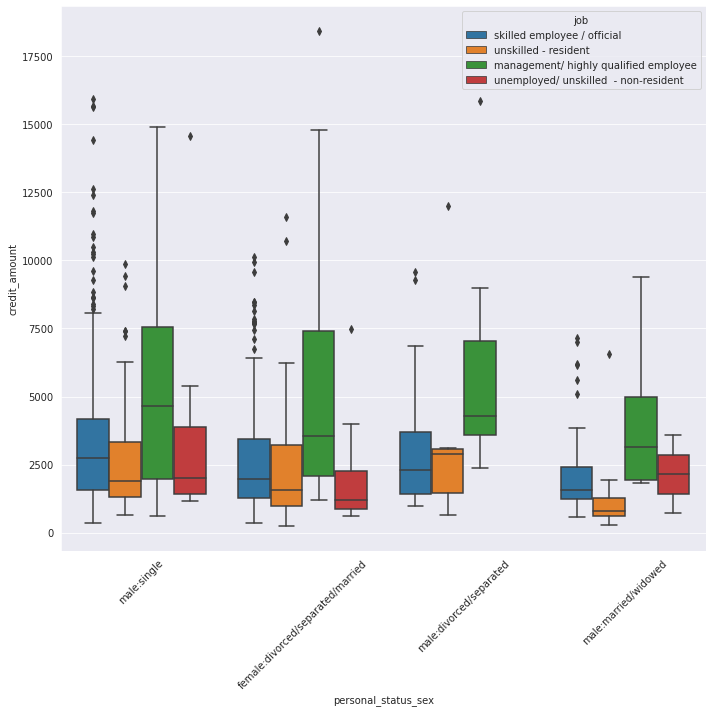

In [ ]:
boxplots("personal_status_sex","credit_amount","job")

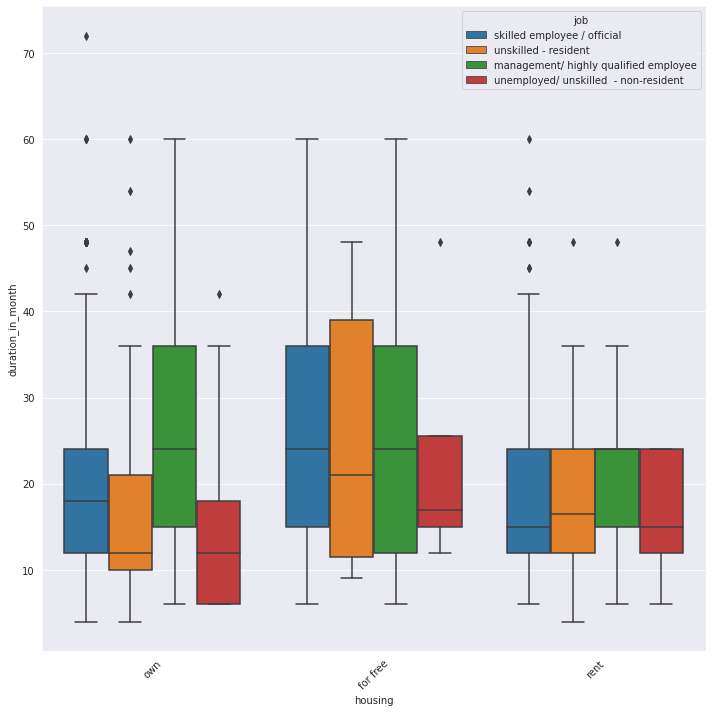

In [ ]:
boxplots("housing","duration_in_month","job")

   Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer


We can see that the job category A174 (management/ self-employed/ highly qualified employee/ officer) seems to take bigger credit amounts for longer duration.

3D plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
def plot_3d(x,y,h):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(df[x], df[y], df[h])
  ax.set_xlabel(x)
  ax.set_ylabel(y)
  ax.set_zlabel(h)

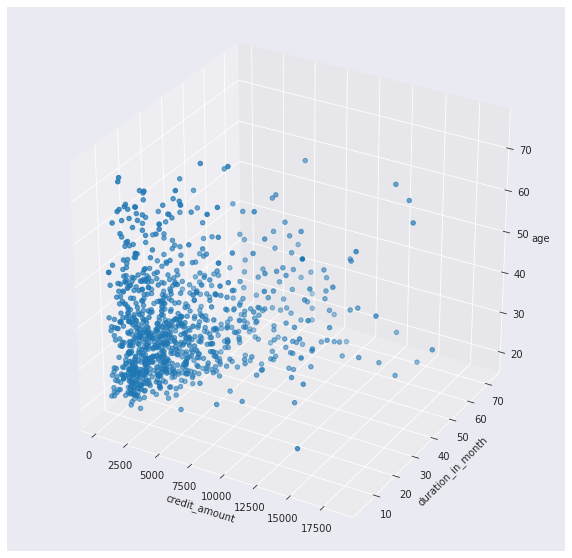

In [ ]:
plot_3d("credit_amount","duration_in_month","age")

account_check_status  

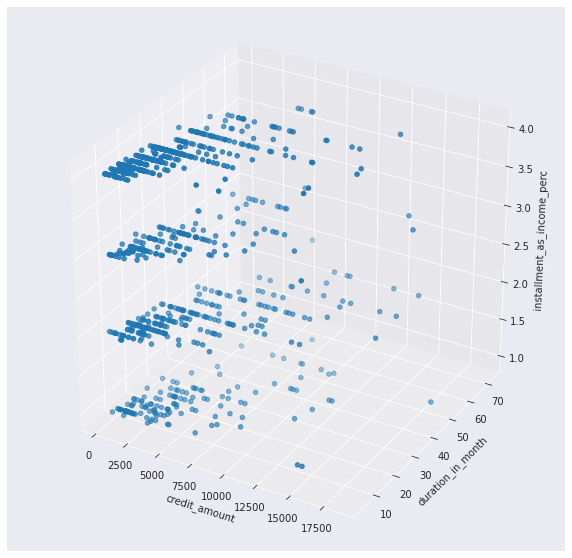

In [ ]:
plot_3d("credit_amount","duration_in_month","installment_as_income_perc")

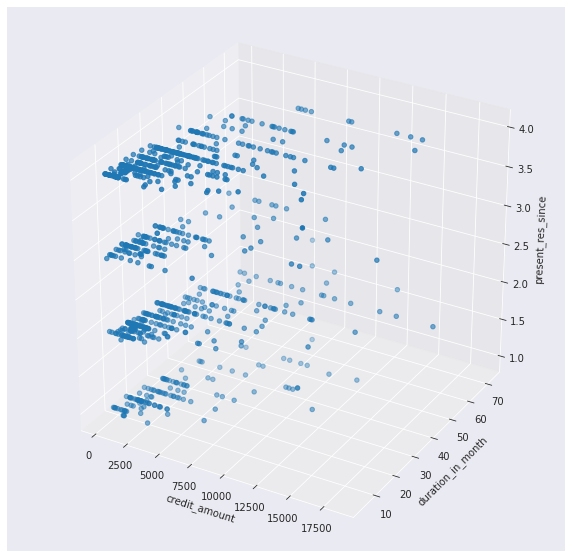

In [ ]:
plot_3d("credit_amount","duration_in_month","present_res_since")  

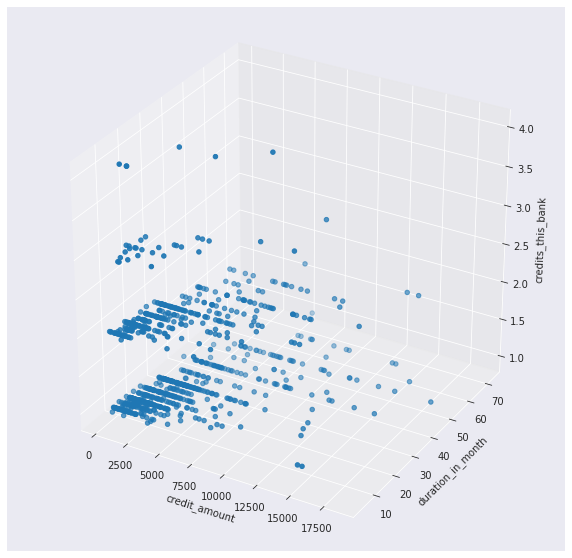

In [ ]:
plot_3d("credit_amount","duration_in_month","credits_this_bank") 

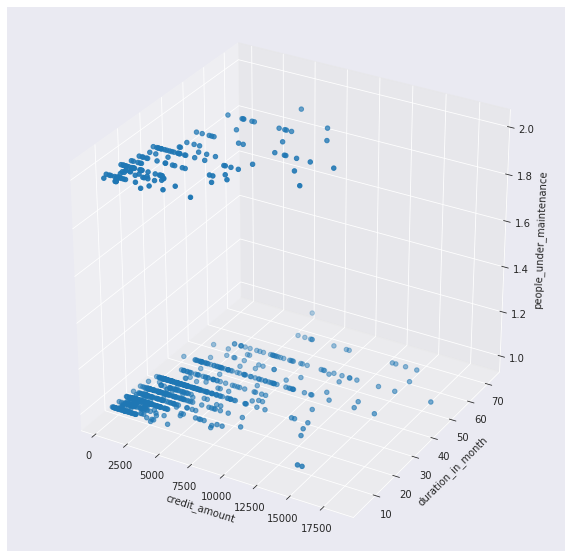

In [ ]:
plot_3d("credit_amount","duration_in_month","people_under_maintenance") 

Show the distributions of numbers data to see if they are skewed.

In [ ]:
def plot_num_data(df):
  fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,1, figsize=(8,24))
  sns.distplot(df["credit_amount"], ax=ax1)
  sns.distplot(df["duration_in_month"], ax=ax2)
  sns.distplot(df["installment_as_income_perc"], ax=ax3)
  sns.distplot(df["present_res_since"], ax=ax4)
  sns.distplot(df["age"], ax=ax5)
  sns.distplot(df["credits_this_bank"], ax=ax6)
  plt.tight_layout()

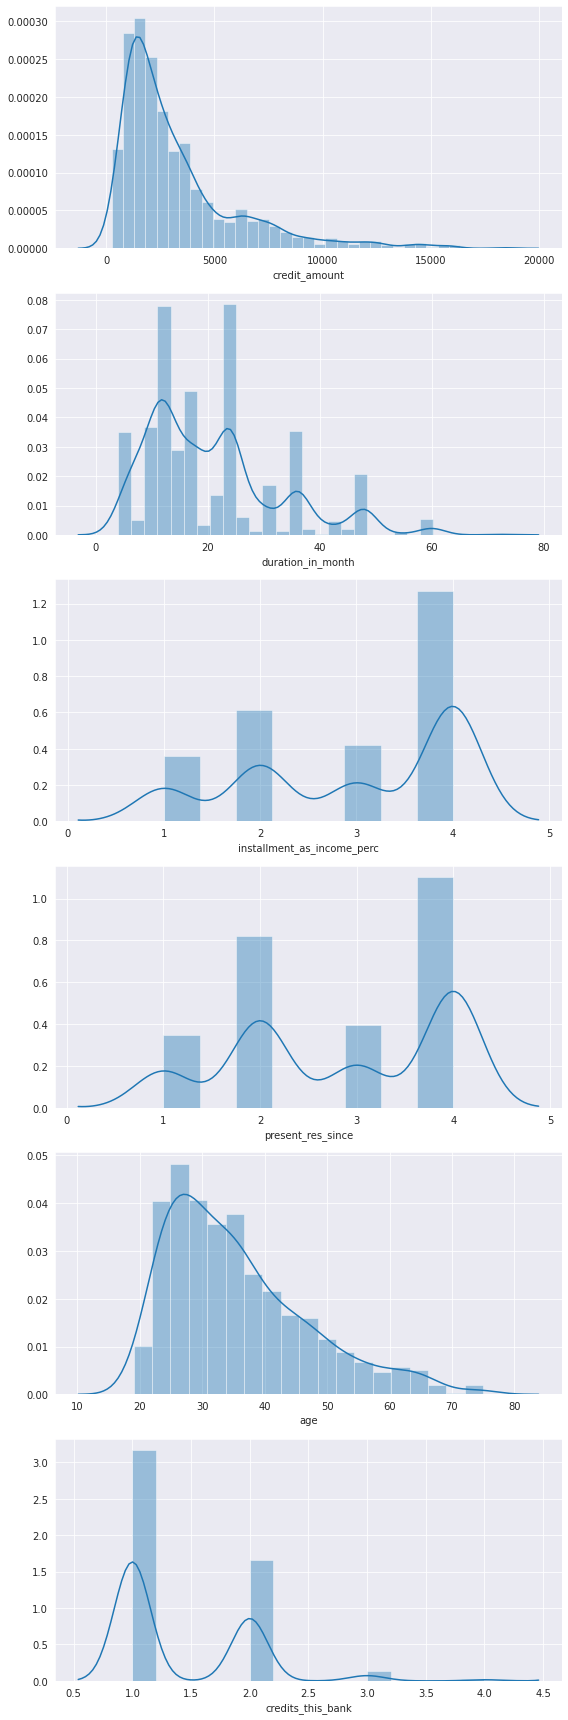

In [ ]:
plot_num_data(df)

# **Data Preprocessing**

As I mentioned @ Data narrative, I think I should merge some categorical features.

##First,we should make the categorical features to numic(I will not use the numerical dataset here).I will make it by myself.

Let's check again.

In [52]:
for key in report_cluster.keys():
  make_percent_report(report_cluster,key,df)

There is only 3.7% of "no" in "foreign_worker" feature here. The ratio is so low, this feature will become outliers which will affect our algorithm implementation, so I think we can remove this feature first.

In [53]:
df_clean=df.drop(['foreign_worker'],axis=1).copy()

In [54]:
df_clean.shape

(1000, 20)

Similarly,I will merge some categorical features such as other_debtors,other_installment_plans,account_check_status,credits_this_bank,job,personal_status_sex,credit_history,savings,and purpose.

In [55]:
#Merge the categarical features
other_debtors_guarantors={'none':"none", 'co-applicant':"co-applicant/guarantor", 'guarantor':"co-applicant/guarantor"}
df_clean.other_debtors=df_clean.other_debtors.map(other_debtors_guarantors)

In [56]:
df_clean["other_debtors"].value_counts()

none                      907
co-applicant/guarantor     93
Name: other_debtors, dtype: int64

In [57]:
other_installment_plans2={'none':"none", 'bank':"bank/store", 'store':"bank/store"}
df_clean["other_installment_plans"]=df_clean["other_installment_plans"].map(other_installment_plans2)

In [58]:
df_clean["other_installment_plans"].value_counts()

none          814
bank/store    186
Name: other_installment_plans, dtype: int64

In [59]:
df_clean.account_check_status.value_counts()

no checking account    394
<0 DM                  274
0 <= <200 DM           269
>= 200 DM               63
Name: account_check_status, dtype: int64

In [60]:
df_clean.account_check_status.replace(to_replace='0 <= <200 DM',value='>0 DM' ,inplace=True)
df_clean.account_check_status.replace(to_replace='>= 200 DM ',value='>0 DM' ,inplace=True)

In [61]:
df_clean.account_check_status.value_counts()

no checking account    394
>0 DM                  332
<0 DM                  274
Name: account_check_status, dtype: int64

In [62]:
df_clean.credits_this_bank.value_counts()

1    633
2    333
3     28
4      6
Name: credits_this_bank, dtype: int64

In [63]:
df_clean.credits_this_bank.replace(3,2,inplace=True)
df_clean.credits_this_bank.replace(4,2,inplace=True)

In [64]:
df_clean.credits_this_bank.value_counts()

1    633
2    367
Name: credits_this_bank, dtype: int64

here 2 means >=2 now.

In [65]:
df_clean.job.value_counts()

skilled employee / official              630
unskilled - resident                     200
management/ highly qualified employee    148
unemployed/ unskilled  - non-resident     22
Name: job, dtype: int64

In [66]:
df_clean.job.replace(to_replace='unemployed/ unskilled  - non-resident',value='unskilled',inplace=True)
df_clean.job.replace(to_replace='unskilled - resident',value='unskilled',inplace=True)

In [67]:
df_clean.job.value_counts()

skilled employee / official              630
unskilled                                222
management/ highly qualified employee    148
Name: job, dtype: int64

In [68]:
df_clean.personal_status_sex.value_counts()

male:single                          548
female:divorced/separated/married    310
male:married/widowed                  92
male:divorced/separated               50
Name: personal_status_sex, dtype: int64

In [69]:
df_clean.personal_status_sex.replace('male:married/widowed','male',inplace=True)
df_clean.personal_status_sex.replace('male:single','male',inplace=True)
df_clean.personal_status_sex.replace('male:divorced/separated','male',inplace=True)
df_clean.personal_status_sex.replace('female:divorced/separated/married','female',inplace=True)

In [70]:
df_clean.personal_status_sex.value_counts()

male      690
female    310
Name: personal_status_sex, dtype: int64

In [71]:
df_clean.credit_history.value_counts()

existing credits paid back duly till now    530
critical account                            293
delay in paying off                          88
all credits at this bank paid back duly      49
no credits taken                             40
Name: credit_history, dtype: int64

In [72]:
df_clean.credit_history.replace('existing credits paid back duly till now','paid back duly',inplace=True)
df_clean.credit_history.replace('all credits at this bank paid back duly','paid back duly',inplace=True)
df_clean.credit_history.replace('delay in paying off','critical account',inplace=True)

In [73]:
df_clean.credit_history.value_counts()

paid back duly      579
critical account    381
no credits taken     40
Name: credit_history, dtype: int64

In [74]:
df_clean.savings.value_counts()

<100 DM               603
no savings account    183
100 <= <500 DM        103
500 <= < 1000 DM       63
>= 1000 DM             48
Name: savings, dtype: int64

In [75]:
df_clean.savings.replace('>= 1000 DM','>=500',inplace=True)
df_clean.savings.replace('500 <= < 1000 DM','>=500',inplace=True)

In [76]:
df_clean.savings.value_counts()

<100 DM               603
no savings account    183
>=500                 111
100 <= <500 DM        103
Name: savings, dtype: int64

In [77]:
df_clean.purpose.value_counts()

radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
others                  12
domestic appliances     12
retraining               9
Name: purpose, dtype: int64

In [78]:
df_clean.purpose.replace('radio/television','Household consumption',inplace=True)
df_clean.purpose.replace('furniture/equipment','Household consumption',inplace=True)
df_clean.purpose.replace('repairs','Household consumption',inplace=True)
df_clean.purpose.replace('domestic appliances','Household consumption',inplace=True)
df_clean.purpose.replace('retraining','others',inplace=True)
df_clean.purpose.replace('education','others',inplace=True)
df_clean.purpose.replace('business','others',inplace=True)
df_clean.purpose.replace('car (new)','car',inplace=True)
df_clean.purpose.replace('car (used)','car',inplace=True)

In [79]:
df_clean.purpose.value_counts()

Household consumption    495
car                      337
others                   168
Name: purpose, dtype: int64

Now purpose becomes to three kinds here.

In [80]:
new_column_names=df_clean.columns.tolist()

In [81]:
new_column_names

['account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'classification']

In [82]:
df_clean.present_emp_since.value_counts()

1<= < 4 years    339
>=7 years        253
4<= <7 years     174
<1 years         172
unemployed        62
Name: present_emp_since, dtype: int64

In [83]:
df_clean.present_emp_since.replace('unemployed', '<1 years',inplace=True)

In [84]:
df_clean.present_emp_since.value_counts()

1<= < 4 years    339
>=7 years        253
<1 years         234
4<= <7 years     174
Name: present_emp_since, dtype: int64

show again

In [85]:
new_cat_cols=new_column_names.copy()
for col in cons_number_cols:
   new_cat_cols.remove(col)
new_cat_cols_cats={}
for name in new_cat_cols:
    new_cat_cols_cats[name]=len(df_clean[name].unique().tolist())
new_cat_cols_cats

new_report_cluster={}
for i in range(0,np.asarray(list(new_cat_cols_cats.values())).max()+1):
    if [j for j,k in new_cat_cols_cats.items() if k == i]:
        new_report_cluster[i]=[l for l,m in new_cat_cols_cats.items() if m == i]
new_report_cluster


{2: ['personal_status_sex',
  'other_debtors',
  'other_installment_plans',
  'credits_this_bank',
  'people_under_maintenance',
  'telephone',
  'classification'],
 3: ['account_check_status', 'credit_history', 'purpose', 'housing', 'job'],
 4: ['savings',
  'present_emp_since',
  'installment_as_income_perc',
  'present_res_since',
  'property']}

In [86]:
for key in new_report_cluster.keys():
  make_percent_report(new_report_cluster,key,df_clean)

It is more clear now.

##Binarize the target to 0/1  -> 0 = 'bad' credit;  1 = 'good' credit

In [87]:
df_clean.classification.replace(['Good Risk','Bad Risk'], [1,0], inplace=True)

In [88]:
df_clean.classification.value_counts()

1    700
0    300
Name: classification, dtype: int64

In [89]:
df_clean.head()

account_check_status  duration_in_month    credit_history  \
0                <0 DM                  6  critical account   
1                >0 DM                 48    paid back duly   
2  no checking account                 12  critical account   
3                <0 DM                 42    paid back duly   
4                <0 DM                 24  critical account   

                 purpose  credit_amount             savings present_emp_since  \
0  Household consumption           1169  no savings account         >=7 years   
1  Household consumption           5951             <100 DM     1<= < 4 years   
2                 others           2096             <100 DM      4<= <7 years   
3  Household consumption           7882             <100 DM      4<= <7 years   
4                    car           4870             <100 DM     1<= < 4 years   

   installment_as_income_perc personal_status_sex           other_debtors  \
0                           4                male                    none   
1                           2              female                    none   
2                           2                male                    none   
3                           2                male  co-applicant/guarantor   
4                           3                male                    none   

   present_res_since                          property  age  \
0                  4                       real estate   67   
1                  2                       real estate   22   
2                  3                       real estate   49   
3                  4  savings agreement/life insurance   45   
4                  4             unknown / no property   53   

  other_installment_plans   housing  credits_this_bank  \
0                    none       own                  2   
1                    none       own                  1   
2                    none       own                  1   
3                    none  for free                  1   
4                    none  for free                  2   

                           job  people_under_maintenance telephone  \
0  skilled employee / official                         1       yes   
1  skilled employee / official                         1      none   
2                    unskilled                         2      none   
3  skilled employee / official                         2      none   
4  skilled employee / official                         2      none   

   classification  
0               1  
1               0  
2               1  
3               1  
4               0

##"""Encoder to number"""


In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   account_check_status        1000 non-null   object
 1   duration_in_month           1000 non-null   int64 
 2   credit_history              1000 non-null   object
 3   purpose                     1000 non-null   object
 4   credit_amount               1000 non-null   int64 
 5   savings                     1000 non-null   object
 6   present_emp_since           1000 non-null   object
 7   installment_as_income_perc  1000 non-null   int64 
 8   personal_status_sex         1000 non-null   object
 9   other_debtors               1000 non-null   object
 10  present_res_since           1000 non-null   int64 
 11  property                    1000 non-null   object
 12  age                         1000 non-null   int64 
 13  other_installment_plans     1000 non-null   objec

In [92]:
num_cols

['duration_in_month',
 'credit_amount',
 'installment_as_income_perc',
 'present_res_since',
 'age',
 'credits_this_bank',
 'people_under_maintenance',
 'classification']

In [93]:
new_column_names=df_clean.columns.tolist()

In [94]:
new_str_cols=new_column_names.copy()
for col in num_cols:
   new_str_cols.remove(col)
new_str_cols 

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone']

Encoding to numbers

In [95]:
df_clean_encode=df_clean.copy()
number = LabelEncoder()
for col_name in new_str_cols:
  df_clean_encode[col_name] = number.fit_transform(df_clean_encode[col_name].astype(str))

result:

In [96]:
for col_name in new_str_cols:
  print(df_clean_encode[col_name].value_counts())

2    394
1    332
0    274
Name: account_check_status, dtype: int64
2    579
0    381
1     40
Name: credit_history, dtype: int64
0    495
1    337
2    168
Name: purpose, dtype: int64
1    603
3    183
2    111
0    103
Name: savings, dtype: int64
0    339
3    253
2    234
1    174
Name: present_emp_since, dtype: int64
1    690
0    310
Name: personal_status_sex, dtype: int64
1    907
0     93
Name: other_debtors, dtype: int64
0    332
1    282
2    232
3    154
Name: property, dtype: int64
1    814
0    186
Name: other_installment_plans, dtype: int64
1    713
2    179
0    108
Name: housing, dtype: int64
1    630
2    222
0    148
Name: job, dtype: int64
0    596
1    404
Name: telephone, dtype: int64


In [97]:
df_clean_encode.describe()

account_check_status  duration_in_month  credit_history      purpose  \
count            1000.00000        1000.000000     1000.000000  1000.000000   
mean                1.12000          20.903000        1.198000     0.673000   
std                 0.80886          12.058814        0.960061     0.746075   
min                 0.00000           4.000000        0.000000     0.000000   
25%                 0.00000          12.000000        0.000000     0.000000   
50%                 1.00000          18.000000        2.000000     1.000000   
75%                 2.00000          24.000000        2.000000     1.000000   
max                 2.00000          72.000000        2.000000     2.000000   

       credit_amount      savings  present_emp_since  \
count    1000.000000  1000.000000        1000.000000   
mean     3271.258000     1.374000           1.401000   
std      2822.736876     0.898293           1.193995   
min       250.000000     0.000000           0.000000   
25%      1365.500000     1.000000           0.000000   
50%      2319.500000     1.000000           1.000000   
75%      3972.250000     2.000000           3.000000   
max     18424.000000     3.000000           3.000000   

       installment_as_income_perc  personal_status_sex  other_debtors  \
count                 1000.000000          1000.000000    1000.000000   
mean                     2.973000             0.690000       0.907000   
std                      1.118715             0.462725       0.290578   
min                      1.000000             0.000000       0.000000   
25%                      2.000000             0.000000       1.000000   
50%                      3.000000             1.000000       1.000000   
75%                      4.000000             1.000000       1.000000   
max                      4.000000             1.000000       1.000000   

       present_res_since     property          age  other_installment_plans  \
count        1000.000000  1000.000000  1000.000000              1000.000000   
mean            2.845000     1.208000    35.546000                 0.814000   
std             1.103718     1.066712    11.375469                 0.389301   
min             1.000000     0.000000    19.000000                 0.000000   
25%             2.000000     0.000000    27.000000                 1.000000   
50%             3.000000     1.000000    33.000000                 1.000000   
75%             4.000000     2.000000    42.000000                 1.000000   
max             4.000000     3.000000    75.000000                 1.000000   

           housing  credits_this_bank         job  people_under_maintenance  \
count  1000.000000        1000.000000  1000.00000               1000.000000   
mean      1.071000           1.367000     1.07400                  1.155000   
std       0.531264           0.482228     0.60406                  0.362086   
min       0.000000           1.000000     0.00000                  1.000000   
25%       1.000000           1.000000     1.00000                  1.000000   
50%       1.000000           1.000000     1.00000                  1.000000   
75%       1.000000           2.000000     1.00000                  1.000000   
max       2.000000           2.000000     2.00000                  2.000000   

         telephone  classification  
count  1000.000000     1000.000000  
mean      0.404000        0.700000  
std       0.490943        0.458487  
min       0.000000        0.000000  
25%       0.000000        0.000000  
50%       0.000000        1.000000  
75%       1.000000        1.000000  
max       1.000000        1.000000

##Standardization

In [98]:
numdata_std = pd.DataFrame(ss().fit_transform(df_clean_encode.drop(['classification'],axis=1)))

In [99]:
column_names_std=new_column_names.copy()

In [100]:
column_names_std

['account_check_status',
 'duration_in_month',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'classification']

In [101]:
column_names_std.remove("classification")

In [102]:
numdata_std.columns=column_names_std

In [103]:
numdata_std.head()

account_check_status  duration_in_month  credit_history   purpose  \
0             -1.385358          -1.236478       -1.248461 -0.902506   
1             -0.148431           2.248194        0.835781 -0.902506   
2              1.088496          -0.738668       -1.248461  1.779532   
3             -1.385358           1.750384        0.835781 -0.902506   
4             -1.385358           0.256953       -1.248461  0.438513   

   credit_amount   savings  present_emp_since  installment_as_income_perc  \
0      -0.745131  1.811005           1.339871                    0.918477   
1       0.949817 -0.416553          -1.173959                   -0.870183   
2      -0.416562 -0.416553          -0.336015                   -0.870183   
3       1.634247 -0.416553          -0.336015                   -0.870183   
4       0.566664 -0.416553          -1.173959                    0.024147   

   personal_status_sex  other_debtors  present_res_since  property       age  \
0             0.670280       0.320212           1.046987 -0.195089  2.766456   
1            -1.491914       0.320212          -0.765977 -0.195089 -1.191404   
2             0.670280       0.320212           0.140505 -0.195089  1.183312   
3             0.670280      -3.122929           1.046987  0.742840  0.831502   
4             0.670280       0.320212           1.046987  1.680770  1.535122   

   other_installment_plans   housing  credits_this_bank       job  \
0                 0.478018 -0.133710           1.313315 -0.122566   
1                 0.478018 -0.133710          -0.761432 -0.122566   
2                 0.478018 -0.133710          -0.761432  1.533727   
3                 0.478018 -2.016956          -0.761432 -0.122566   
4                 0.478018 -2.016956           1.313315 -0.122566   

   people_under_maintenance  telephone  
0                 -0.428290   1.214598  
1                 -0.428290  -0.823318  
2                  2.334869  -0.823318  
3                  2.334869  -0.823318  
4                  2.334869  -0.823318

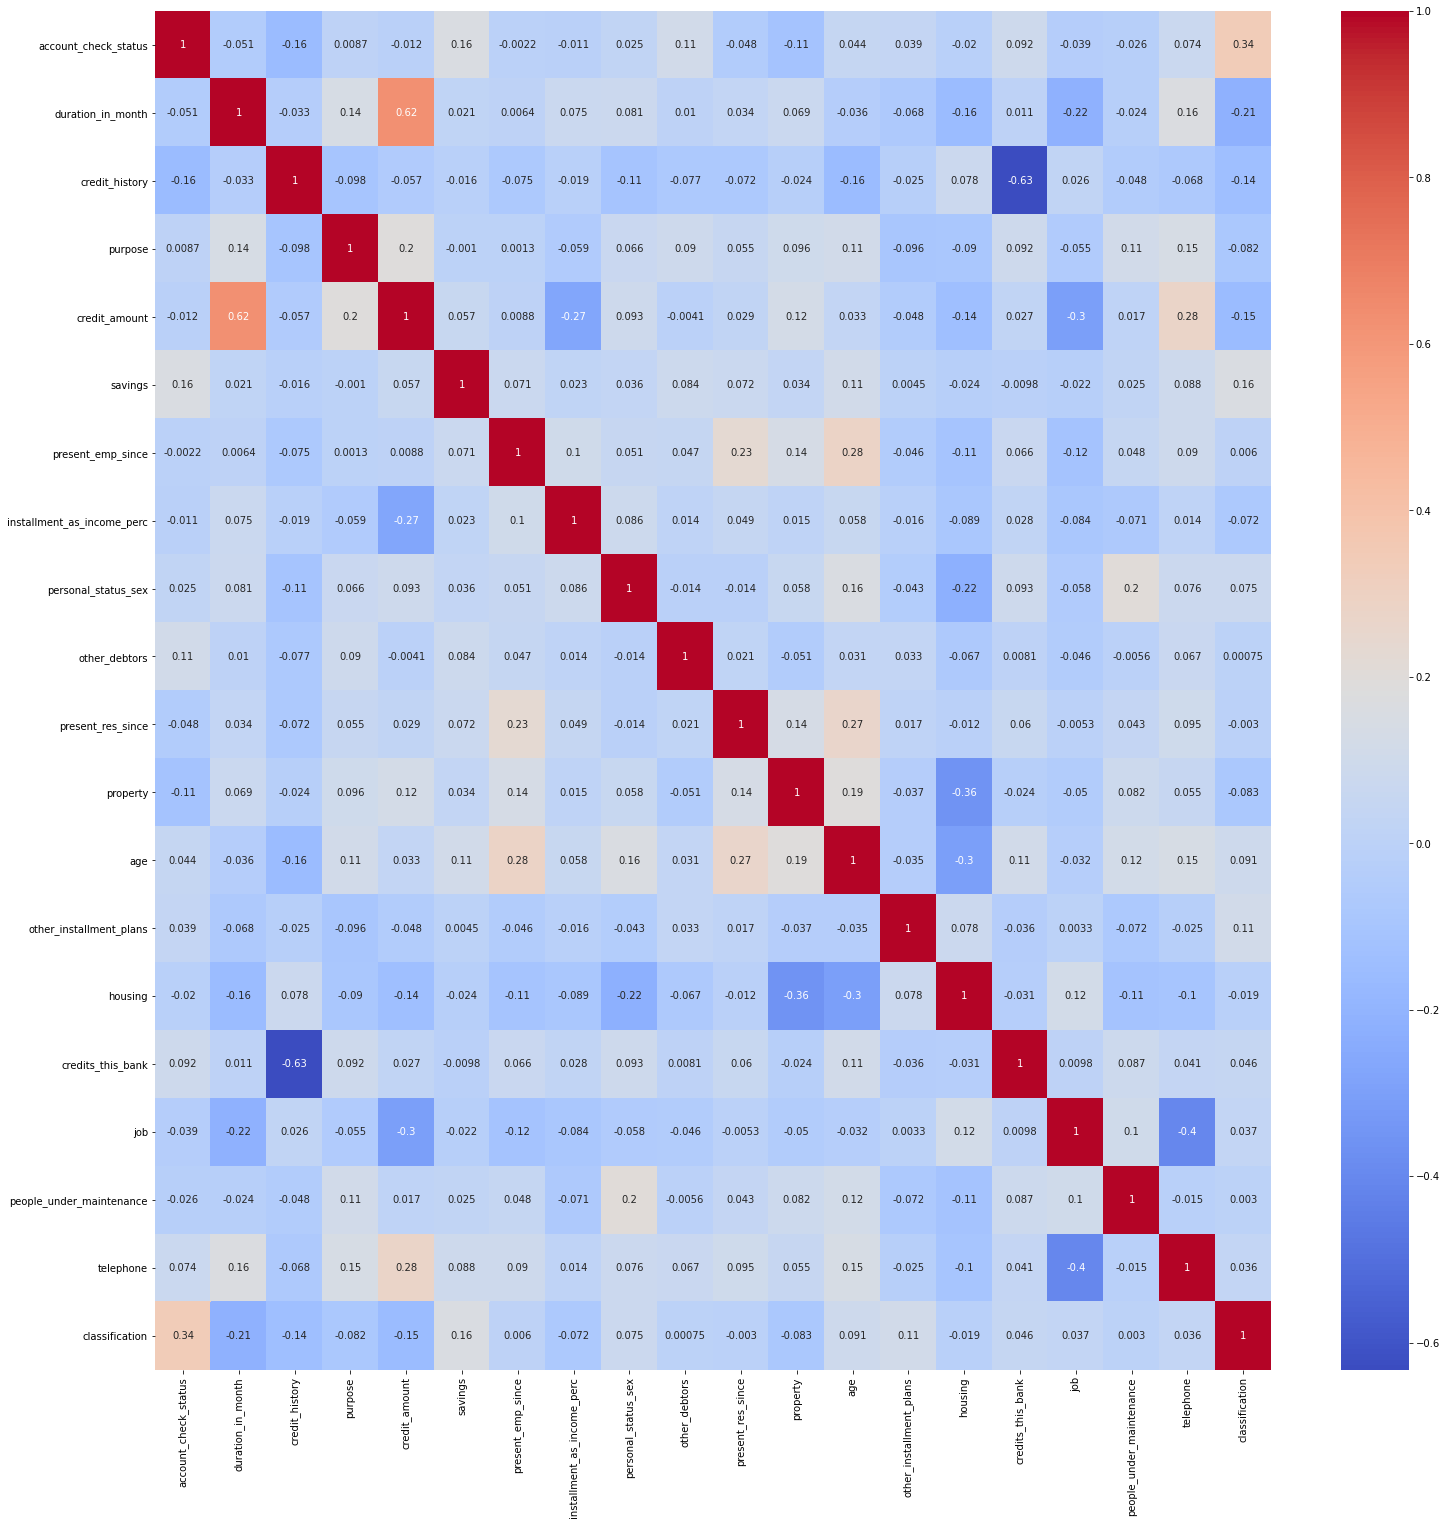

In [104]:
plot_corr(df_clean_encode)

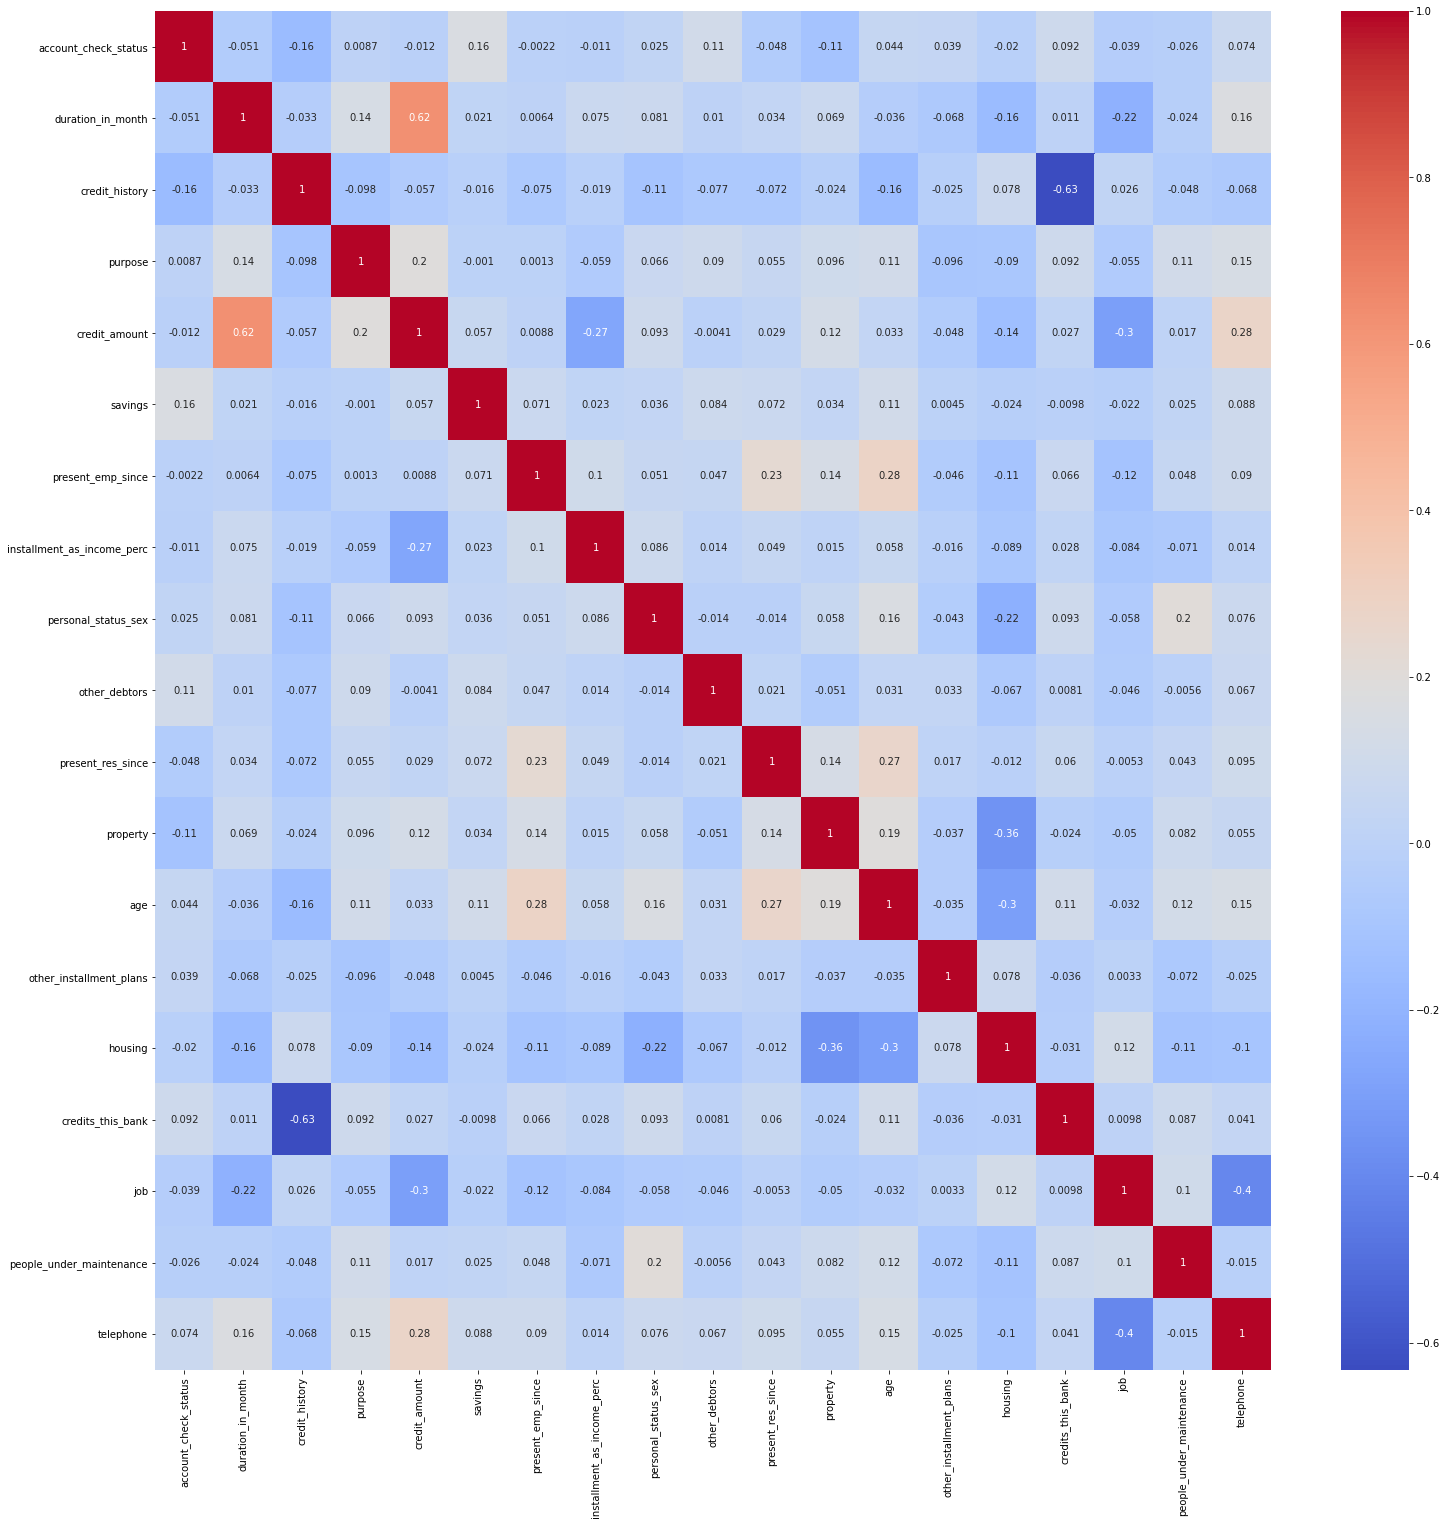

In [105]:
plot_corr(numdata_std)

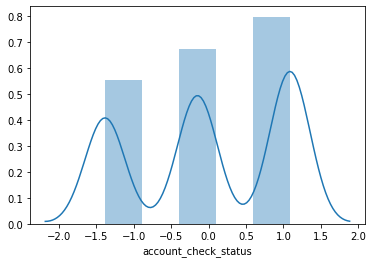

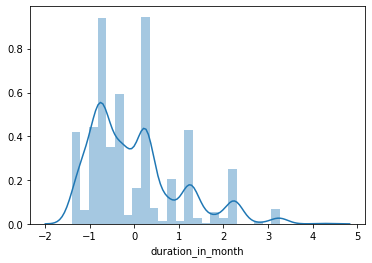

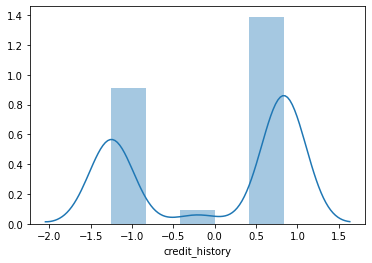

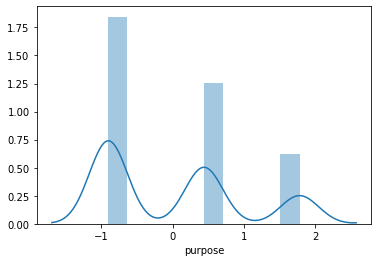

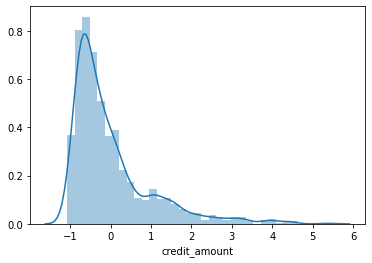

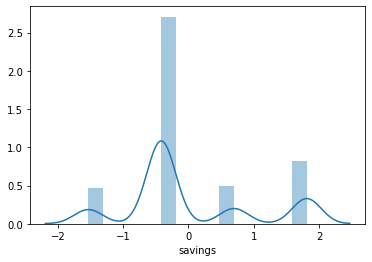

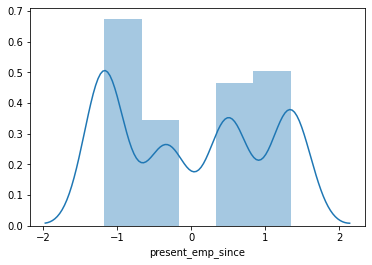

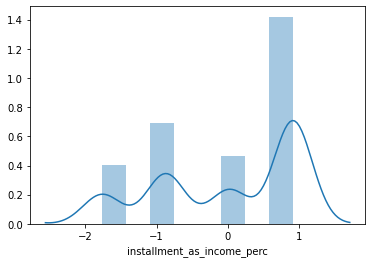

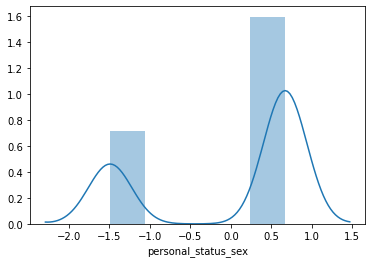

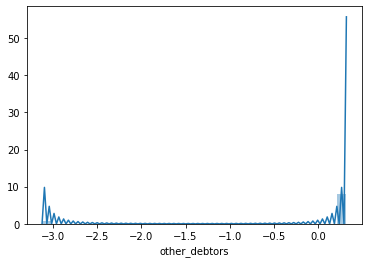

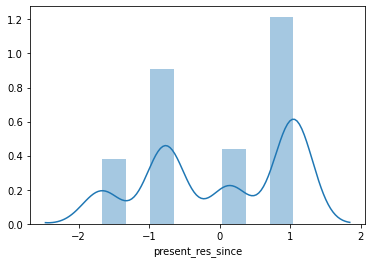

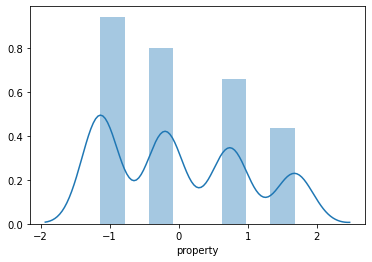

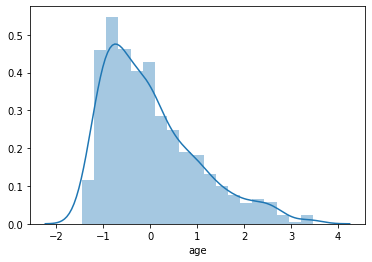

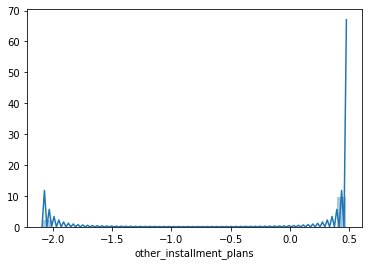

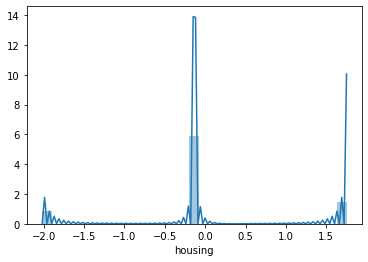

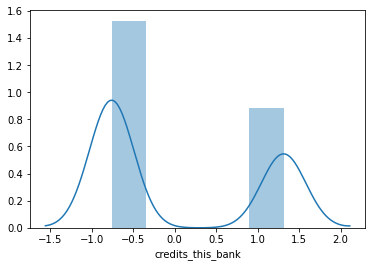

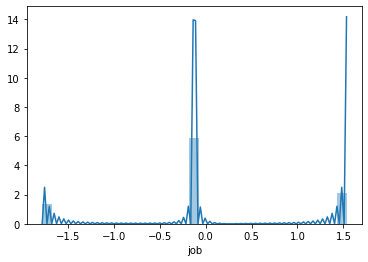

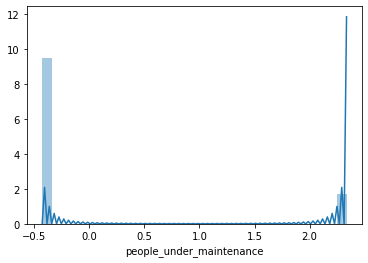

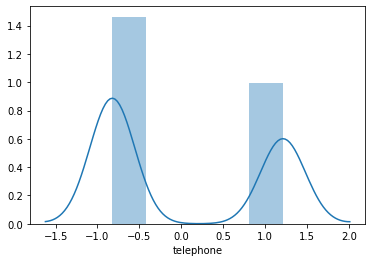

In [106]:
for col_name in numdata_std.columns:
  plt.figure()
  sns.distplot(numdata_std[col_name])
  plt.show()

log the data for clustering

In [107]:
cluster_log = np.log(numdata_std[cons_number_cols])

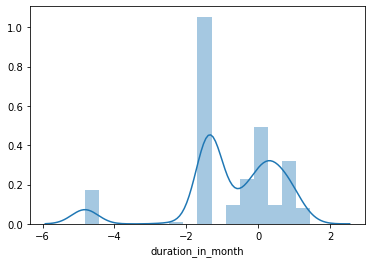

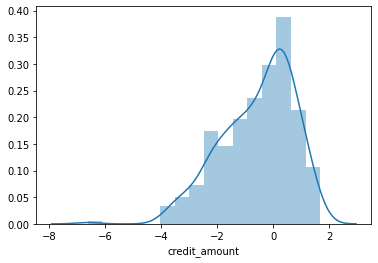

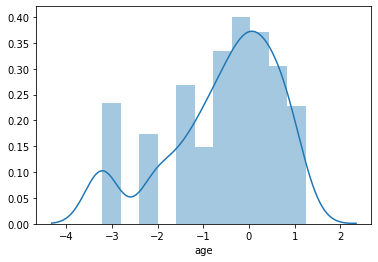

In [108]:
for col_name in cons_number_cols:
  plt.figure()
  sns.distplot(cluster_log[col_name])
  plt.show()

Assumptions: The age of the customer affects the probability of a good loan, controlling the purpose of the loan (defined as essential or unnecessary, household appliances, maintenance, education and retraining are considered essential) and the amount of the loan. In the analysis, we will also include the purpose of the loan. If young people borrow money for things like cars or TVs, the bad consequences of the loan are more likely to occur because young people may be irresponsible and purchase expensive cars / TVs without knowing how to repay them. loan. On the other hand, for essential things such as education and maintenance, we do not want to see this difference between the elderly and the young. Let's try to fit the model through interaction without fitting, and determine whether the interaction should be included.

So we should make the "age" to categorical feature(I will apply some clustering on it later)

# **Implementation of MIL**

###import lib

In [109]:
%matplotlib inline
import copy
import re
import yaml
import uuid
import warnings
import time
import random
import torch
import cv2
import pandas as pd
from torch import nn
import tensorflow as tf
from tensorflow import keras
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision.datasets import MNIST
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect

from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from torch.utils.data import DataLoader

from functools import partial, reduce
from random import shuffle

from sklearn import metrics as mtx
from sklearn import model_selection as ms

from torch.nn import functional as F
import torch.optim as optim
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision.models import resnet

import numpy as np
import matplotlib.pyplot as plt
import os, time
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import layer_utils
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, CSVLogger
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Defining model from pretrain

In [182]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


In [189]:
def build_binary_model():
    model = Sequential()
    model.add(Dense(16, input_dim=19, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = build_binary_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
#Enable GPU 
print(tf.__version__)
print(tf.test.gpu_device_name())

2.3.0
/device:GPU:0


##Define the features X and the target y

In [112]:
X = numdata_std
X.shape

(1000, 19)

X

In [121]:
X

account_check_status  duration_in_month  credit_history   purpose  \
0               -1.385358          -1.236478       -1.248461 -0.902506   
1               -0.148431           2.248194        0.835781 -0.902506   
2                1.088496          -0.738668       -1.248461  1.779532   
3               -1.385358           1.750384        0.835781 -0.902506   
4               -1.385358           0.256953       -1.248461  0.438513   
..                    ...                ...             ...       ...   
995              1.088496          -0.738668        0.835781 -0.902506   
996             -1.385358           0.754763        0.835781  0.438513   
997              1.088496          -0.738668        0.835781 -0.902506   
998             -1.385358           1.999289        0.835781 -0.902506   
999             -0.148431           1.999289       -1.248461  0.438513   

     credit_amount   savings  present_emp_since  installment_as_income_perc  \
0        -0.745131  1.811005           1.339871                    0.918477   
1         0.949817 -0.416553          -1.173959                   -0.870183   
2        -0.416562 -0.416553          -0.336015                   -0.870183   
3         1.634247 -0.416553          -0.336015                   -0.870183   
4         0.566664 -0.416553          -1.173959                    0.024147   
..             ...       ...                ...                         ...   
995      -0.544162 -0.416553          -0.336015                    0.024147   
996       0.207612 -0.416553          -1.173959                    0.918477   
997      -0.874503 -0.416553           1.339871                    0.918477   
998      -0.505528 -0.416553          -1.173959                    0.918477   
999       0.462457 -1.530333           0.501928                    0.024147   

     personal_status_sex  other_debtors  present_res_since  property  \
0               0.670280       0.320212           1.046987 -0.195089   
1              -1.491914       0.320212          -0.765977 -0.195089   
2               0.670280       0.320212           0.140505 -0.195089   
3               0.670280      -3.122929           1.046987  0.742840   
4               0.670280       0.320212           1.046987  1.680770   
..                   ...            ...                ...       ...   
995            -1.491914       0.320212           1.046987 -0.195089   
996             0.670280       0.320212           1.046987  0.742840   
997             0.670280       0.320212           1.046987 -1.133019   
998             0.670280       0.320212           1.046987  1.680770   
999             0.670280       0.320212           1.046987 -1.133019   

          age  other_installment_plans   housing  credits_this_bank       job  \
0    2.766456                 0.478018 -0.133710           1.313315 -0.122566   
1   -1.191404                 0.478018 -0.133710          -0.761432 -0.122566   
2    1.183312                 0.478018 -0.133710          -0.761432  1.533727   
3    0.831502                 0.478018 -2.016956          -0.761432 -0.122566   
4    1.535122                 0.478018 -2.016956           1.313315 -0.122566   
..        ...                      ...       ...                ...       ...   
995 -0.399832                 0.478018 -0.133710          -0.761432  1.533727   
996  0.391740                 0.478018 -0.133710          -0.761432 -1.778858   
997  0.215835                 0.478018 -0.133710          -0.761432 -0.122566   
998 -1.103451                 0.478018 -2.016956          -0.761432 -0.122566   
999 -0.751642                 0.478018 -0.133710          -0.761432 -0.122566   

     people_under_maintenance  telephone  
0                   -0.428290   1.214598  
1                   -0.428290  -0.823318  
2                    2.334869  -0.823318  
3                    2.334869  -0.823318  
4                    2.334869  -0.823318  
..                        ...        ...  
995                 -0.42829

In [113]:
y= df_clean_encode.classification
y.shape

(1000,)

## Prepare data for model

## Divide the data into  training set and testing set

In [119]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,stratify=y, random_state=0)

In [120]:
X_train.shape

(700, 19)

In [125]:
X_train.shape[0]

700

In [129]:
y_train[200]

1

In [177]:
X_train, X_val, y_train, y_val = tts(X_train,y_train,test_size=0.1)

In [178]:
X_train.shape

(630, 19)

In [180]:
X_val.shape

(70, 19)

####to_tensor function

In [181]:
X_train.index

Int64Index([ 14, 247, 623, 556,  66, 175, 876, 769,  58, 809,
            ...
            145, 148, 147, 260, 734, 618, 129, 385,  45, 736],
           dtype='int64', length=630)

In [ ]:
max_number_instance = 7
tensor_train = to_tensor(X_train, max_number_instance)

> ### Create tuple (index, label) for train and test

In [132]:
instance_index_label = [(i, y_train[i]) for i in X_train.index]

In [ ]:
instance_index_label

In [134]:
instance_index_label_test = [(i, y_test[i]) for i in X_test.index]

#### find the index if label is 1 in training data

In [136]:
find_index1 = [instance_index_label[i][0] for i in range(len(instance_index_label)) if instance_index_label[i][1]==1]

In [146]:
len(find_index1)

490

#### find the index if label is 1 in testing data

In [137]:
find_index1_test = [instance_index_label_test[i][0] for i in range(len(instance_index_label_test))
                   if instance_index_label_test[i][1]==1]

In [147]:
len(find_index1_test)

210

## **Visualize the accuracy and loss **

In [117]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

    
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

## Model Fit

In [ ]:
!pip install pyyaml h5py
import os, datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint as mcp
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [148]:
run_eagerly = EarlyStopping(monitor='loss', min_delta=0, patience=20, verbose=1, mode='auto')
callbacks_list = [run_eagerly,tensorboard_callback]

In [151]:
import datetime


In [190]:
# fit the binary model on the training data
history=model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=50, batch_size=10)

Epoch 1/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6823 - accuracy: 0.6778 - val_loss: 0.6850 - val_accuracy: 0.5857
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.7127 - val_loss: 0.6707 - val_accuracy: 0.5857
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.7127 - val_loss: 0.6522 - val_accuracy: 0.5857
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.7127 - val_loss: 0.6377 - val_accuracy: 0.5857
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.7127 - val_loss: 0.6228 - val_accuracy: 0.5857
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.7127 - val_loss: 0.6093 - val_accuracy: 0.5857
Epoch 7/50
63/63 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7127 - val_loss: 0.5988 - val_accuracy: 0.5857
Epoch 8/50
63/63 [==

In [192]:
model.save('model1_trained_1.hdf5')

In [193]:
checkpointer2 = ModelCheckpoint(filepath='best_model2.hdf5', verbose=1, save_best_only=True)
csv_logger2 = CSVLogger('history_2.log')
callbacks_list2 = [run_eagerly,tensorboard_callback,csv_logger2, checkpointer2]

In [194]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=6)

### Tune Inception Pretrained model 

In [197]:
hist2=model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=100, batch_size=20,callbacks=[early_stopping,tensorboard_callback])

Epoch 1/100
 1/32 [..............................] - ETA: 0s - loss: 0.5817 - accuracy: 0.9000WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
32/32 [==============================] - 0s 11ms/step - loss: 0.4910 - accuracy: 0.7905 - val_loss: 0.5761 - val_accuracy: 0.7000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4933 - accuracy: 0.7762 - val_loss: 0.5825 - val_accuracy: 0.7000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4780 - accuracy: 0.7841 - val_loss: 0.5793 - val_accuracy: 0.7000
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4838 - accuracy: 0.7857 - val_loss: 0.5786 - val_accuracy: 0.7000
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.

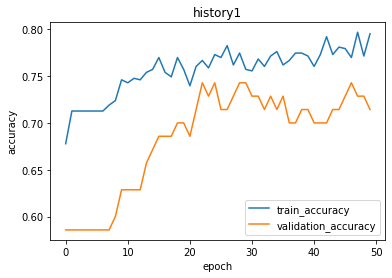

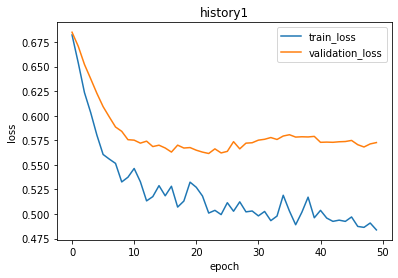

In [199]:
plot_accuracy(history,'history1')
plot_loss(history,'history1')

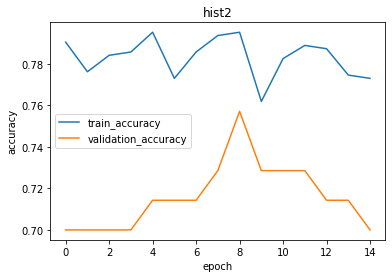

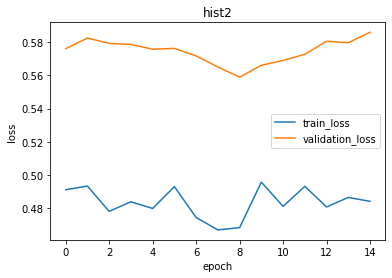

In [198]:
plot_accuracy(hist2,'hist2')
plot_loss(hist2,'hist2')

# Conclusion:

In [196]:
from sklearn.metrics import classification_report, accuracy_score

pred = np.round(model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Results for Binary Model
0.7666666666666667
              precision    recall  f1-score   support

           0       0.70      0.39      0.50        90
           1       0.78      0.93      0.85       210

    accuracy                           0.77       300
   macro avg       0.74      0.66      0.67       300
weighted avg       0.76      0.77      0.74       300



In [ ]:
!tensorboard dev upload --logdir ./logs --name "Assignment1_part1 TensorBoard"

2020-09-09 05:54:16.749909: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&sc

 TensorBoard live at: https://tensorboard.dev/experiment/NBtoBFeWSN2dMjdvAXF5ng/